# Assn 5 Task 3 Credit One Regression and Classification

# Import Libraries

In [227]:
import pandas as pd

In [228]:
import matplotlib.pyplot as plt

In [229]:
import numpy as np

In [230]:
import scipy

In [231]:
from math import sqrt

In [232]:
import os

In [233]:
import seaborn as sns

In [234]:
from sklearn.model_selection import train_test_split  

In [381]:
from sklearn.model_selection import KFold

In [235]:
from sklearn.feature_selection import VarianceThreshold

In [236]:
from pandas.plotting import scatter_matrix

In [237]:
from pandas import Series, DataFrame

In [238]:
import pickle

In [239]:
from sklearn.decomposition import PCA

In [240]:
from sklearn.feature_selection import RFE

In [1099]:
import warnings

In [1355]:
from sklearn.metrics import classification_report

In [1356]:
from sklearn.metrics import confusion_matrix

In [1434]:
from yellowbrick.classifier import ClassificationReport

In [1435]:
from sklearn.metrics import roc_curve

In [241]:
# from pandas import HDFStore

In [242]:
# estimators

In [243]:
from sklearn.ensemble import RandomForestRegressor

In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
from sklearn.svm import SVR

In [246]:
from sklearn import linear_model

In [247]:
# Classification models

In [248]:
from sklearn import tree

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
from sklearn.naive_bayes import GaussianNB

In [251]:
from sklearn.neighbors import KNeighborsClassifier

In [252]:
from sklearn.tree import DecisionTreeClassifier

In [253]:
from sklearn.linear_model import SGDClassifier

In [254]:
from sklearn.svm import SVC 

In [255]:
from sklearn.ensemble import AdaBoostClassifier 

In [256]:
from sklearn.ensemble import GradientBoostingClassifier

In [257]:
# model metrics

In [258]:
from sklearn.metrics import mean_squared_error

In [259]:
from sklearn.metrics import r2_score

In [260]:
from sklearn.model_selection import cross_val_score

In [261]:
# for classification 
# https://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import make_scorer

In [262]:
# cross validation

In [264]:
# standardization, mean removal and variance scaling

In [265]:
from sklearn import preprocessing

In [266]:
# scalers

In [267]:
from sklearn.preprocessing import MinMaxScaler

In [268]:
from sklearn.preprocessing import RobustScaler

In [269]:
from sklearn.preprocessing import MaxAbsScaler

In [270]:
from sklearn.preprocessing import StandardScaler

# Miscellaneous

In [1100]:
# Hide Warninga as they cause noise
warnings.simplefilter('ignore')


# Read Data Set using Pandas

In [564]:
# Determine current working directory
pwd = os.getcwd()
print(pwd)

/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task3


In [565]:
# Change the directory where our file is
pwd = os.chdir('/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task3')
print(os.getcwd())

/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task3


In [591]:
# read data set using pandas
# Do not add in this code or there are no header names
creditNoID = pd.read_csv('CreditNoID.csv')
creditNoID.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [661]:
# credit extra columns
creditExtraCols = pd.read_csv('CreditExtraCols.csv')
creditExtraCols.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month,age_group,High_School,defaulted,BAL_LIMIT_GROUPED,age_by_decade
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,under_thirty,Female_Col,yes,10000s,20s
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,under_thirty,Female_Col,yes,10000s,20s
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,thirty_and_over,Female_Col,no,10000s,30s
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,thirty_and_over,Female_Col,no,10000s,30s
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,thirty_and_over,Male_Col,no,10000s,50s


In [595]:
creditExtraCols.info

<bound method DataFrame.info of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  Hx_PAY_Sept_05  \
0          20000    2          2         1   24               2   
1         120000    2          2         2   26              -1   
2          90000    2          2         2   34               0   
3          50000    2          2         1   37               0   
4          50000    1          2         1   57              -1   
5          50000    1          1         2   37               0   
6         500000    1          1         2   29               0   
7         100000    2          2         2   23               0   
8         140000    2          3         1   28               0   
9          20000    1          3         2   35              -2   
10        200000    2          3         2   34               0   
11        260000    2          1         2   51              -1   
12        630000    2          2         2   41              -1   
13         70000    1         

In [596]:
creditExtraCols.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month
count,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,...,29546.000000,29546.000000,29546.000000,29546.000000,2.954600e+04,29546.000000,29546.00000,29546.000000,29546.000000,29546.000000
mean,167288.759223,1.603127,1.807216,1.552494,35.476680,-0.013403,-0.129188,-0.161375,-0.216408,-0.262472,...,43079.160529,40205.462770,38830.233636,5654.450653,5.889732e+03,5178.045184,4823.34668,4784.102755,5178.649056,0.223482
std,129896.152263,0.489257,0.699585,0.521758,9.215519,1.124756,1.200354,1.200871,1.172978,1.136772,...,64166.922919,60675.159066,59492.913633,16597.652294,2.309323e+04,17513.133896,15716.53061,15231.499371,17665.520958,0.416586
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2333.250000,1782.000000,1285.000000,996.250000,8.215000e+02,390.000000,299.00000,264.000000,133.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19007.500000,18091.500000,17120.000000,2100.000000,2.005000e+03,1800.000000,1500.00000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53978.750000,50021.000000,49105.500000,5004.000000,5.000000e+03,4500.000000,4010.00000,4026.750000,4000.000000,0.000000
max,1000000.000000,2.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.00000,426529.000000,528666.000000,1.000000


In [593]:
# read data set using pandas
creditCorr = pd.read_csv('CreditCorr.csv')
creditCorr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Bill_stmt_Sept_05,Bill_stmt_Jul_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3913,689,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,2682,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,29239,13559,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,46990,49291,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,8617,35835,19131,2000,36681,10000,9000,689,679,0


In [594]:
# credit extra columns with correlated features removed
creditCorrEx = pd.read_csv('CreditCorrEx.csv')
creditCorrEx.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,age_group,High_School,defaulted,BAL_LIMIT_GROUPED,age_by_decade
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,under_thirty,Female_Col,yes,10000s,20s
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,under_thirty,Female_Col,yes,10000s,20s
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,thirty_and_over,Female_Col,no,10000s,30s
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,thirty_and_over,Female_Col,no,10000s,30s
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,thirty_and_over,Male_Col,no,10000s,50s


# Selecting Data

In [597]:
#features
# changed from [:,12:23]  because the ID column is gone
featuresCEC = creditExtraCols.iloc[:,11:22]
print('Summary of feature sample')
featuresCEC.head()

Summary of feature sample


,Bill_stmt_Sept_05,Bill_stmt_Aug_05,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [598]:
#dependent variable
depVarCEC = creditExtraCols['Amt_Paid_Apr_05']
depVarCEC.head()

0       0
1    2000
2    5000
3    1000
4     679
Name: Amt_Paid_Apr_05, dtype: int64

In [599]:
#Training Set (Feature Space: X Training)   1000 rows
X_trainCEC = (featuresCEC[: 1000])
X_trainCEC.head()

,Bill_stmt_Sept_05,Bill_stmt_Aug_05,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [600]:
#Dependent Variable Training Set (y Training) 1000 rows
y_trainCEC = depVarCEC[: 1000]
y_trainCEC_count = len(y_trainCEC.index)
print('The number of observations in the Y training set are:',str(y_trainCEC_count))
y_trainCEC.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: Amt_Paid_Apr_05, dtype: int64

In [601]:
#Testing Set (X Testing) 100 rows
# THIS GET OVERWRITTEN BY THE CROSS VALIDATION CODE
X_testCEC = featuresCEC[-100:]
X_testCEC_count = len(X_testCEC.index)
print('The number of observations in the feature testing set is:',str(X_testCEC_count))
# print(X_testCECReg.head())
X_testCEC.head()

The number of observations in the feature testing set is: 100


,Bill_stmt_Sept_05,Bill_stmt_Aug_05,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05
29446,14498,13968,15739,17168,17580,18295,0,2000,2000,1000,1000
29447,142044,142087,255846,140057,100177,100873,6100,5528,4500,3500,4000
29448,16809,0,0,0,0,0,0,0,0,0,0
29449,50845,48750,103486,50590,50248,49387,0,6556,3250,1563,1208
29450,10392,168088,168955,161351,126198,124746,168096,6409,7335,4448,4519


In [602]:
#Ground Truth (y_test) 100 rows
# THIS GET OVERWRITTEN BY THE CROSS VALIDATION CODE
y_testCEC = depVarCEC[-100:]
y_testCEC_count = len(y_testCEC.index)
print('The number of observations in the Y training set are:',str(y_testCEC_count))
y_testCEC.head()

The number of observations in the Y training set are: 100


29446    1000
29447    4000
29448       0
29449     781
29450    5003
Name: Amt_Paid_Apr_05, dtype: int64

# Cross Validation

In [603]:
# Very good article comparing cross validation in R and python
# https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In [604]:
X_trainCEC, X_testCEC, y_trainCEC, y_testCEC = train_test_split(X_trainCEC, y_trainCEC)
X_trainCEC.shape, X_testCEC.shape

((750, 11), (250, 11))

# Building the Model and Choosing the Right Model -- Regression

In [580]:
# example of model parameters from Ski-Kit Learn Reference
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
# model = LinearRegression(n_jobs=10)

In [605]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [606]:
# the features we established previously
featuresCEC.head()

,Bill_stmt_Sept_05,Bill_stmt_Aug_05,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [607]:
depVarCEC.head()

0       0
1    2000
2    5000
3    1000
4     679
Name: Amt_Paid_Apr_05, dtype: int64

In [1103]:
# Random Forest Regression
modelRF.fit(X_trainCEC,y_trainCEC)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1104]:
print('The RF scores per cv split, score array, train, test: ', 
      cross_val_score(modelRF, X_trainCEC, y_trainCEC)) 

The RF scores per cv split, score array, train, test:  [0.16157205 0.38216561 0.43703704]


In [1105]:
print ('RF Score:', modelRF.score(X_testCEC, y_testCEC))  # R-squared is the default metric used by Sklearn.

RF Score: 0.22


In [1106]:
# Support Vector Regression
modelSVR.fit(X_trainCEC,y_trainCEC)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [1107]:
print('The SVR scores per cv split, score array, train, test: ', 
      cross_val_score(modelSVR, X_trainCEC, y_trainCEC)) 

The SVR scores per cv split, score array, train, test:  [-0.02041857 -0.05086828 -0.05248607]


In [1108]:
print ('SVR Score:', modelSVR.score(X_testCEC, y_testCEC))  # R-squared is the default metric used by Sklearn.

SVR Score: -0.03556557984947717


In [1109]:
# Linear Regression 
modelLR = modelLR.fit(X_trainCEC,y_trainCEC)

In [1110]:
print('The LR scores per cv split, score array, train, test: ', 
      cross_val_score(modelLR, X_trainCEC, y_trainCEC)) 

The LR scores per cv split, score array, train, test:  [ 0.18618257 -0.3084408  -3.40639212]


In [1111]:
print ('LR Score:', modelLR.score(X_testCEC, y_testCEC))  # R-squared is the default metric used by Sklearn.

LR Score: 0.49917701517420626


In [300]:
# Linear Regression has the highest R-squared

##  Serialize Model , Delete Model, and Restore Model using Pickle

In [301]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_model.sav'

In [302]:
# save model LR using pickle to .sav file
pickle.dump(modelLR, open(filename, 'wb'))

In [78]:
# delete modelLR  to test restore of pickle .sav  file
# del modelLR
# modelLR

In [79]:
# load deleted model using pickle
loaded_modelLR = pickle.load(open(filename, 'rb'))

In [80]:
# verify model is restored by scoring outcome.  
# Results should be the same as above -- 0.32809149187436315 -- they are!
result = loaded_modelLR.score(X_testCEC, y_testCEC)
print(result)

-0.5264899796458453


In [1112]:
# more results from loaded model
print('The LR scores per cv split, score array, train, test: ', 
      cross_val_score(loaded_modelLR, X_trainCEC, y_trainCEC)) 

The LR scores per cv split, score array, train, test:  [ 0.18618257 -0.3084408  -3.40639212]


## Making Predictions -- Regression

In [617]:
predictionsLR = modelLR.predict(X_testCEC)
predictionsLR

array([ 1.02016621e+02,  3.94947412e+03,  8.73149468e+03, -2.92541477e+02,
        3.51343549e+03,  2.15446866e+02, -7.75493862e+02, -1.06456089e+04,
        1.03308007e+04, -1.62310451e+02,  3.40551332e+03,  1.77652179e+03,
        2.97470221e+02,  2.63708854e+04,  3.22511200e+04,  9.10071120e+02,
       -3.73940936e+02,  3.44724817e+03, -2.34211659e+02, -5.59886315e+02,
       -2.77323876e+02,  1.68414670e+03,  6.98074781e+02,  8.86212361e+02,
        1.57417880e+04, -7.75493862e+02,  3.09376284e+04, -7.75164055e+02,
        3.52804443e+03,  1.13977006e+03,  1.64067356e+04, -7.83338797e+02,
        7.88169733e+04,  4.54958103e+03,  1.27213881e+02,  2.82484766e+03,
        4.18182079e+02,  1.68162625e+04,  4.40521836e+04,  5.07466478e+03,
        1.29655424e+04, -7.75493862e+02, -1.29593554e+02,  4.30639747e+00,
       -7.75493862e+02, -2.21541320e+02, -4.60441531e+03,  1.07501010e+03,
        1.01003262e+03,  2.07499125e+02,  1.47745803e+04, -6.89111714e+02,
       -2.95272342e+02, -

In [618]:
# Calculate RMSE using sqrt and mean_squared_error
rmseCEC = sqrt(mean_squared_error(y_testCEC, predictionsLR))
print('RMSE: %.3f' % rmseCEC)

RMSE: 17263.031


In [619]:
# Calculate R-squared using  ground truth and the predictions 
predRsquaredCEC = r2_score(y_testCEC,predictionsLR)
print('R Squared: %.3f' % predRsquaredCEC)

R Squared: 0.499


# Plot the Results


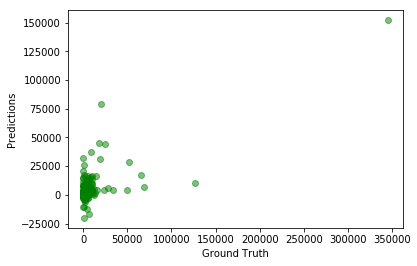

In [620]:
plt.scatter(y_testCEC, predictionsLR, color=['g'],alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Classification

# Selecting Data

In [662]:
creditExtraColsEd  = creditExtraCols
creditExtraColsEd

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month,age_group,High_School,defaulted,BAL_LIMIT_GROUPED,age_by_decade
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,under_thirty,Female_Col,yes,10000s,20s
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,under_thirty,Female_Col,yes,10000s,20s
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,thirty_and_over,Female_Col,no,10000s,30s
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,thirty_and_over,Female_Col,no,10000s,30s
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,thirty_and_over,Male_Col,no,10000s,50s
5,50000,1,1,2,37,0,0,0,0,0,...,657,1000,1000,800,0,thirty_and_over,Male_Grad_School,no,10000s,30s
6,500000,1,1,2,29,0,0,0,0,0,...,38000,20239,13750,13770,0,under_thirty,Male_Grad_School,no,410000s,20s
7,100000,2,2,2,23,0,-1,-1,0,0,...,0,581,1687,1542,0,under_thirty,Female_Col,no,10000s,20s
8,140000,2,3,1,28,0,0,2,0,0,...,432,1000,1000,1000,0,under_thirty,Female_HS,no,10000s,20s
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,1122,0,0,thirty_and_over,Male_HS,no,10000s,30s


In [663]:
# drop the default_payment_next_month column and keep the defaulted column
creditExtraColsEd  = creditExtraColsEd.drop(['default_payment_next_month'], axis =1)

In [664]:
# drop the AGE column as we have age binned in age_by_decade
creditExtraColsEd  = creditExtraColsEd.drop(['AGE'], axis =1)

In [665]:
# drop the LIMIT_BAL column as we have LIMIT_BAL binned by groups of $250,000 in BAL_LIMIT_GROUPED
creditExtraColsEd  = creditExtraColsEd.drop(['LIMIT_BAL'], axis =1)

In [666]:
# list distinct values in a EDUCATION column to verify 0,4,5, and 6 are represented as 0 (all are OTHER status)
creditExtraColsEd.EDUCATION.unique()
# values are correct

array([2, 1, 3, 0])

In [667]:
# rename High_School column to Educ_Gender
creditExtraColsEd.rename(columns={'High_School':'Educ_Gender'},inplace=True)

In [668]:
# remove Educ_Gender as classification cannot handle strings.  The data is duplicate of Sex and Education columns
# so no information is lost
creditExtraColsEd = creditExtraColsEd.drop(['Educ_Gender'], axis = 1)

In [669]:
# move defaulted column to be the last column
cols = creditExtraColsEd.columns.tolist()
column_to_move = "defaulted"
new_position = 26
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
creditExtraColsEd = creditExtraColsEd[cols]

In [1115]:
# remove age_group   as it only creates two age groups
creditExtraColsEd = creditExtraColsEd.drop(['age_group'], axis = 1)

In [673]:
# remove the character 's' from the BAL_LIMIT_GROUPED and age_by_decade values
# classification cannot handle strings
creditExtraColsEd['BAL_LIMIT_GROUPED'] = creditExtraColsEd['BAL_LIMIT_GROUPED'].map(lambda x: str(x)[:-1])
creditExtraColsEd['age_by_decade'] = creditExtraColsEd['age_by_decade'].map(lambda x: str(x)[:-1])

In [674]:
creditExtraColsEd

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade,defaulted
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,689,0,0,0,0,10000,20,yes
1,2,2,2,-1,2,0,0,0,2,2682,...,3261,0,1000,1000,1000,0,2000,10000,20,yes
2,2,2,2,0,0,0,0,0,0,29239,...,15549,1518,1500,1000,1000,1000,5000,10000,30,no
3,2,2,1,0,0,0,0,0,0,46990,...,29547,2000,2019,1200,1100,1069,1000,10000,30,no
4,1,2,1,-1,0,-1,0,0,0,8617,...,19131,2000,36681,10000,9000,689,679,10000,50,no
5,1,1,2,0,0,0,0,0,0,64400,...,20024,2500,1815,657,1000,1000,800,10000,30,no
6,1,1,2,0,0,0,0,0,0,367965,...,473944,55000,40000,38000,20239,13750,13770,410000,20,no
7,2,2,2,0,-1,-1,0,0,-1,11876,...,567,380,601,0,581,1687,1542,10000,20,no
8,2,3,1,0,0,2,0,0,0,11285,...,3719,3329,0,432,1000,1000,1000,10000,20,no
9,1,3,2,-2,-2,-2,-2,-1,-1,0,...,13912,0,0,0,13007,1122,0,10000,30,no


## Create Training and Test Sets Non Standardized Data

In [675]:
#features
featuresClassi = creditExtraColsEd.iloc[:,0:23]
print('Summary of feature sample')
featuresClassi.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,10000,20
1,2,2,2,-1,2,0,0,0,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,10000,20
2,2,2,2,0,0,0,0,0,0,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,10000,30
3,2,2,1,0,0,0,0,0,0,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,10000,30
4,1,2,1,-1,0,-1,0,0,0,8617,...,19146,19131,2000,36681,10000,9000,689,679,10000,50


In [676]:
#dependent variable
depVarClassi = creditExtraColsEd['defaulted']
depVarClassi.head()

0    yes
1    yes
2     no
3     no
4     no
Name: defaulted, dtype: object

In [677]:
#Training Set (Feature Space: X Training)   1000 rows
X_trainClassi = (featuresClassi[: 1000])
X_trainClassi.head()

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,10000,20
1,2,2,2,-1,2,0,0,0,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,10000,20
2,2,2,2,0,0,0,0,0,0,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,10000,30
3,2,2,1,0,0,0,0,0,0,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,10000,30
4,1,2,1,-1,0,-1,0,0,0,8617,...,19146,19131,2000,36681,10000,9000,689,679,10000,50


In [678]:
#Dependent Variable Training Set (y Training) 1000 rows
y_trainClassi = depVarClassi[: 1000]
y_trainClassi_count = len(y_trainClassi.index)
print('The number of observations in the Y training set are:',str(y_trainClassi_count))
y_trainClassi.head()

The number of observations in the Y training set are: 1000


0    yes
1    yes
2     no
3     no
4     no
Name: defaulted, dtype: object

In [679]:
#Testing Set (X Testing) 100 rows
# THIS GET OVERWRITTEN BY THE CROSS VALIDATION CODE
X_testClassi = featuresClassi[-100:]
X_testClassi_count = len(X_testClassi.index)
print('The number of observations in the feature testing set is:',str(X_testClassi_count))
# print(X_testCECReg.head())
X_testClassi.head()

The number of observations in the feature testing set is: 100


,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade
29446,1,2,2,1,2,0,0,0,0,14498,...,17580,18295,0,2000,2000,1000,1000,1000,10000,30
29447,1,1,2,0,0,0,0,0,0,142044,...,100177,100873,6100,5528,4500,3500,4000,4000,10000,20
29448,1,2,2,0,0,-2,-2,-2,-2,16809,...,0,0,0,0,0,0,0,0,10000,20
29449,1,2,2,1,2,0,0,0,0,50845,...,50248,49387,0,6556,3250,1563,1208,781,10000,20
29450,1,3,2,0,-1,0,0,0,0,10392,...,126198,124746,168096,6409,7335,4448,4519,5003,10000,20


In [680]:
#Ground Truth (y_test) 100 rows
# THIS GET OVERWRITTEN BY THE CROSS VALIDATION CODE
y_testClassi = depVarClassi[-100:]
y_testClassi_count = len(y_testClassi.index)
print('The number of observations in the Y training set are:',str(y_testClassi_count))
y_testClassi.head()

The number of observations in the Y training set are: 100


29446     no
29447    yes
29448    yes
29449     no
29450     no
Name: defaulted, dtype: object

## Cross Validation

In [681]:
# this will overwrite the X_testClassi and y_testClassi from above
X_trainClassi, X_testClassi, y_trainClassi, y_testClassi = train_test_split(X_trainClassi, y_trainClassi)
X_trainClassi.shape, X_testClassi.shape

((750, 23), (250, 23))

## standardization, mean removal and variance scaling

# Rescale and Center Data, Python's Approach (instead of using R)

## May want to remove this

In [1116]:
X_scaled = preprocessing.scale(X_trainClassi)
X_scaled

array([[-1.21124121,  1.79951865, -1.11503681, ..., -0.19178798,
        -0.74335301,  0.08846713],
       [-1.21124121,  1.79951865,  0.74749684, ...,  0.00695549,
        -0.74335301,  0.08846713],
       [-1.21124121, -1.05082768,  0.74749684, ..., -0.19178798,
        -0.74335301, -0.98169982],
       ...,
       [ 0.82559939,  1.79951865,  0.74749684, ...,  1.0242041 ,
        -0.74335301,  0.08846713],
       [-1.21124121, -1.05082768,  0.74749684, ..., -0.11229059,
        -0.74335301, -0.98169982],
       [ 0.82559939, -1.05082768, -1.11503681, ..., -0.19178798,
         0.60656165,  0.08846713]])

In [683]:
scmean = scaler.mean_
scscale = scaler.scale_
print( "Scaler mean is: ", scmean , "  \nScaler scale is: ", scscale )

Scaler mean is:  [-3.36447379e-02 -8.08338277e-02  1.34494192e-01  3.48386667e+01
 -1.17928316e-02 -2.56692138e-02 -8.84749502e-03 -5.42148048e-02
 -6.03583946e-03 -2.44893338e-02 -3.66461412e-02 -2.29195504e-02
 -3.54563565e-02 -4.63096356e-02 -3.56818525e-02 -3.13640471e-02
 -2.64957537e-03 -3.76822124e-02 -4.95806109e-02 -1.54206286e-02
  4.04734729e-02  1.80907781e-02  2.17333333e-01]   
Scaler scale is:  [1.00650473 1.0072241  1.01470312 9.19604833 1.03454912 1.01661184
 1.05370243 1.01697394 1.05348353 1.05895018 1.00170414 1.03017142
 1.01161115 1.05566386 1.03128279 1.05166404 0.8002329  0.68090577
 0.63309484 0.84330046 1.15236725 1.48737973 0.41243127]


In [684]:
# Check for mean of scaled training set
X_scaled.mean(axis=0)

array([-3.78956126e-17, -7.37188088e-17, -1.89478063e-17, -2.84217094e-17,
        4.73695157e-18, -9.47390314e-18,  1.42108547e-17,  4.73695157e-18,
       -3.31586610e-17, -9.47390314e-18, -4.02640884e-17, -1.42108547e-17,
        2.36847579e-17, -4.73695157e-18, -1.42108547e-17, -2.36847579e-18,
        1.89478063e-17,  4.26325641e-17,  2.48689958e-17, -3.78956126e-17,
       -3.55271368e-18,  6.15803704e-17,  1.06581410e-16])

In [685]:
# Look at mean of original training set
X_trainClassi.mean(axis=0)

SEX                  1.594667e+00
EDUCATION            1.737333e+00
MARRIAGE             1.598667e+00
Hx_PAY_Sept_05      -2.666667e-03
Hx_PAY_Aug_05       -1.466667e-01
Hx_PAY_Jul_05       -1.493333e-01
Hx_PAY_Jun_05       -2.773333e-01
Hx_PAY_May_05       -2.866667e-01
Hx_PAY_Apr_05       -3.146667e-01
Bill_stmt_Sept_05    5.006022e+04
Bill_stmt_Aug_05     4.807252e+04
Bill_stmt_Jul_05     4.572822e+04
Bill_stmt_Jun_05     4.080571e+04
Bill_stmt_May_05     3.935036e+04
Bill_stmt_Apr_05     3.804886e+04
Amt_Paid_Sept_05     5.143652e+03
Amt_Paid_Aug_05      5.198271e+03
Amt_Paid_Jul_05      3.909399e+03
Amt_Paid_Jun_05      4.174753e+03
Amt_Paid_May_05      5.166247e+03
Amt_Paid_Apr_05      4.825013e+03
BAL_LIMIT_GROUPED             inf
age_by_decade                 inf
dtype: float64

In [686]:
# check for unit variance of scaled training set
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [687]:
# Look at standard deviation of original training set
X_trainClassi.std(axis=0)

SEX                      0.491284
EDUCATION                0.702137
MARRIAGE                 0.537261
Hx_PAY_Sept_05           1.208556
Hx_PAY_Aug_05            1.258279
Hx_PAY_Jul_05            1.284224
Hx_PAY_Jun_05            1.194287
Hx_PAY_May_05            1.173453
Hx_PAY_Apr_05            1.187237
Bill_stmt_Sept_05    75610.276170
Bill_stmt_Aug_05     74947.112428
Bill_stmt_Jul_05     73184.850432
Bill_stmt_Jun_05     69341.890549
Bill_stmt_May_05     66050.259075
Bill_stmt_Apr_05     65872.904089
Amt_Paid_Sept_05     10355.127397
Amt_Paid_Aug_05      17251.145201
Amt_Paid_Jul_05       9381.168894
Amt_Paid_Jun_05      11541.473498
Amt_Paid_May_05      16728.009586
Amt_Paid_Apr_05      25174.847355
dtype: float64

## Rescale Data

### Determine if the data has outliers to determine approach for scaling

In [688]:
datECtypes = creditExtraColsEd.dtypes
datECtypes

SEX                   int64
EDUCATION             int64
MARRIAGE              int64
Hx_PAY_Sept_05        int64
Hx_PAY_Aug_05         int64
Hx_PAY_Jul_05         int64
Hx_PAY_Jun_05         int64
Hx_PAY_May_05         int64
Hx_PAY_Apr_05         int64
Bill_stmt_Sept_05     int64
Bill_stmt_Aug_05      int64
Bill_stmt_Jul_05      int64
Bill_stmt_Jun_05      int64
Bill_stmt_May_05      int64
Bill_stmt_Apr_05      int64
Amt_Paid_Sept_05      int64
Amt_Paid_Aug_05       int64
Amt_Paid_Jul_05       int64
Amt_Paid_Jun_05       int64
Amt_Paid_May_05       int64
Amt_Paid_Apr_05       int64
BAL_LIMIT_GROUPED    object
age_by_decade        object
defaulted            object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e0b5518>,
      dtype=object)

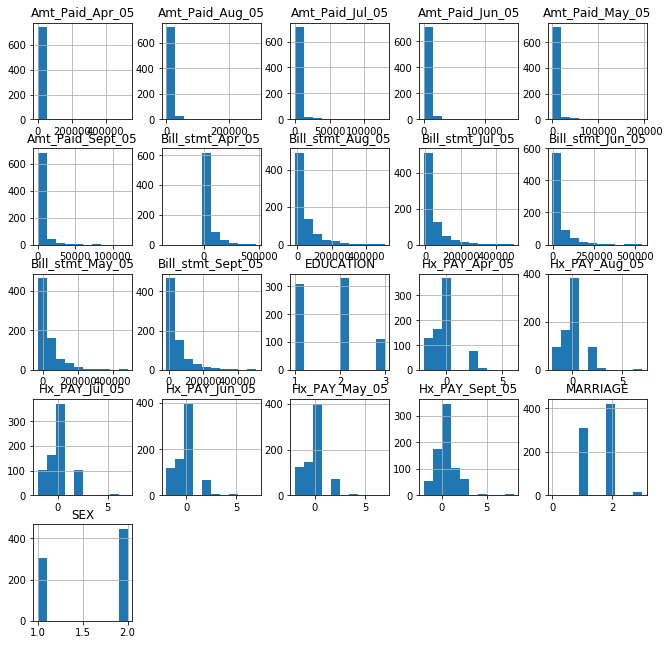

In [689]:
# Feature scaling is the method to limit the range of variables so that they can be 
# compared on common grounds. It is performed on continuous variables. 
# Lets plot the distribution of all the continuous variables in  the data set.
X_trainClassi[X_trainClassi.dtypes[(X_trainClassi.dtypes=="float64")|(X_trainClassi.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [690]:
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [691]:
creditExtraColsEd.describe()
# the mean values vary, we may want to standardize the data

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05
count,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,...,2.954600e+04,29546.000000,29546.000000,29546.000000,29546.000000,2.954600e+04,29546.000000,29546.00000,29546.000000,29546.000000
mean,1.603127,1.807216,1.552494,-0.013403,-0.129188,-0.161375,-0.216408,-0.262472,-0.286435,50867.724464,...,4.674655e+04,43079.160529,40205.462770,38830.233636,5654.450653,5.889732e+03,5178.045184,4823.34668,4784.102755,5178.649056
std,0.489257,0.699585,0.521758,1.124756,1.200354,1.200871,1.172978,1.136772,1.152846,73285.731065,...,6.906749e+04,64166.922919,60675.159066,59492.913633,16597.652294,2.309323e+04,17513.133896,15716.53061,15231.499371,17665.520958
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3540.500000,...,2.657500e+03,2333.250000,1782.000000,1285.000000,996.250000,8.215000e+02,390.000000,299.00000,264.000000,133.250000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22250.000000,...,2.003500e+04,19007.500000,18091.500000,17120.000000,2100.000000,2.005000e+03,1800.000000,1500.00000,1500.000000,1500.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66431.250000,...,5.971825e+04,53978.750000,50021.000000,49105.500000,5004.000000,5.000000e+03,4500.000000,4010.00000,4026.750000,4000.000000
max,2.000000,3.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.00000,426529.000000,528666.000000


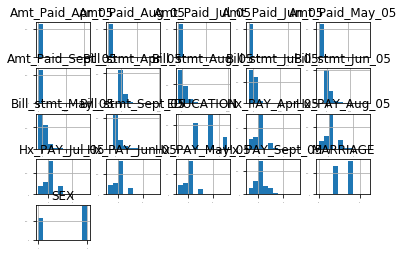

In [692]:
# histograms of each attribute
creditExtraColsEd.hist(sharex=False,sharey=False,layout=(5,5),xlabelsize=1,ylabelsize=.5)
plt.show()

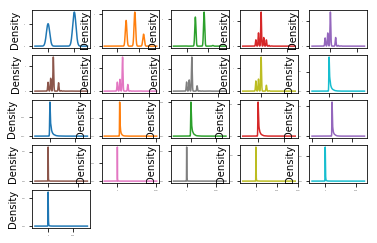

In [693]:
#density 
creditExtraColsEd.plot(kind="density",subplots=True,layout=(5,5),sharex=False,legend=False, fontsize=1) 
plt.show()

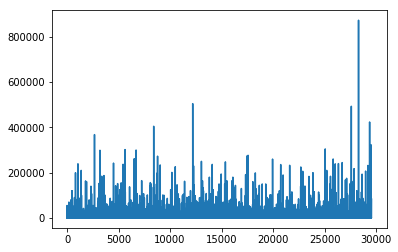

In [694]:
# Make sure the distribution does not have outliers
plt.plot(creditExtraColsEd['Amt_Paid_Sept_05'])
plt.show()

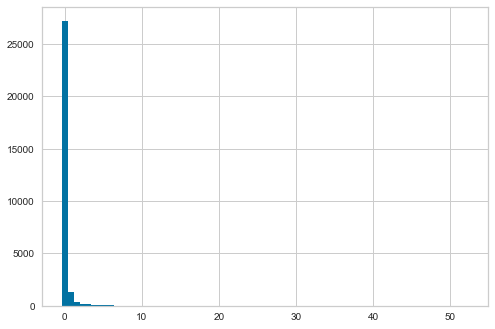

In [1524]:
creditExtraColsEd['Amt_Paid_Sept_05'].hist(bins=70)

Text(0.5, 1.0, 'Amount Paid Sept 05')

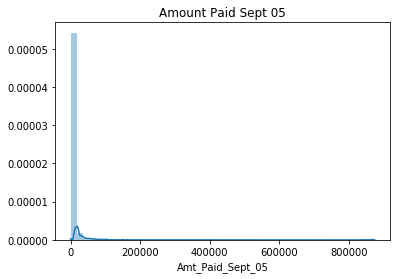

In [696]:
amtpdSep = creditExtraColsEd['Amt_Paid_Sept_05']
pd_dist = sns.distplot(amtpdSep)
pd_dist.set_title("Amount Paid Sept 05")

Text(0.5, 1.0, 'Side-by-Side Histogram Bill Stmt Per Month')

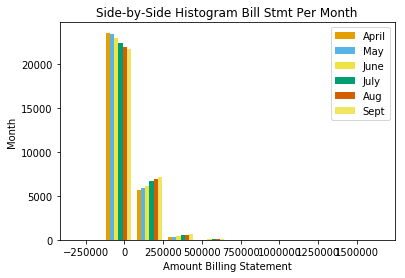

In [697]:
# Make a separate list for each airline
x1 = creditExtraColsEd['Bill_stmt_Apr_05']
x2 = creditExtraColsEd['Bill_stmt_May_05']
x3 = creditExtraColsEd['Bill_stmt_Jun_05']
x4 = creditExtraColsEd['Bill_stmt_Jul_05']
x5 = creditExtraColsEd['Bill_stmt_Aug_05']
x6 = creditExtraColsEd['Bill_stmt_Sept_05']

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#F0E460']
names = ['April', 'May', 'June',
         'July', 'Aug', 'Sept']
plt.hist([x1, x2, x3, x4, x5,x6], # bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Amount Billing Statement')
plt.ylabel('Month')
plt.title('Side-by-Side Histogram Bill Stmt Per Month')

Text(0.5, 1.0, 'Side-by-Side Histogram History Amount Paid Per Month')

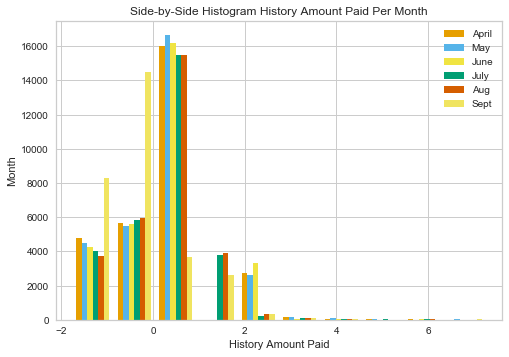

In [1522]:
# Make a separate list for each airline
x1 = creditExtraColsEd['Hx_PAY_Apr_05']
x2 = creditExtraColsEd['Hx_PAY_May_05']
x3 = creditExtraColsEd['Hx_PAY_Jun_05']
x4 = creditExtraColsEd['Hx_PAY_Jul_05']
x5 = creditExtraColsEd['Hx_PAY_Aug_05']
x6 = creditExtraColsEd['Hx_PAY_Sept_05']

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#F0E460']
names = ['April', 'May', 'June',
         'July', 'Aug', 'Sept']
plt.hist([x1, x2, x3, x4, x5,x6], #bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('History Amount Paid')
plt.ylabel('Month')
plt.title('Side-by-Side Histogram History Amount Paid Per Month')

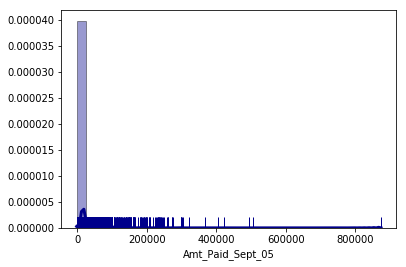

In [699]:
# Density Plot and Histogram of all arrival delays
sns.distplot(creditExtraColsEd['Amt_Paid_Sept_05'], hist=True, kde=True, rug = True,
             bins=int(180/5), 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

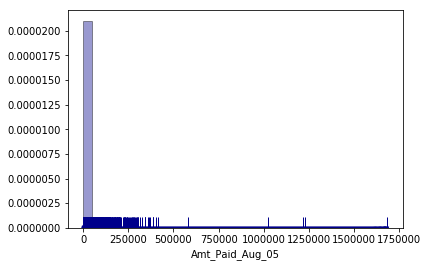

In [700]:
# Density Plot and Histogram of all arrival delays
sns.distplot(creditExtraColsEd['Amt_Paid_Aug_05'], hist=True, kde=True, rug = True,
             bins=int(180/5), 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

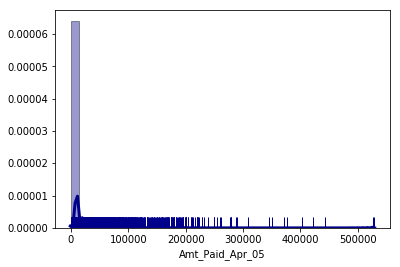

In [701]:
# Density Plot and Histogram of all arrival delays
sns.distplot(creditExtraColsEd['Amt_Paid_Apr_05'], hist=True, kde=True, rug = True,
             bins=int(180/5), 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

### MinMaxScaler Approach to Scaling Data, sensitive to outliers

In [1117]:
scalerM=MinMaxScaler(feature_range=(0,1)) 
rescaleMinMaX_trainClassi=scalerM.fit_transform(X_trainClassi)
rescaleMinMaX_trainClassi

array([[0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.2       ],
       [0.        , 1.        , 0.66666667, ..., 0.00945777, 0.        ,
        0.2       ],
       [0.        , 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.66666667, ..., 0.0578664 , 0.        ,
        0.2       ],
       [0.        , 0.        , 0.66666667, ..., 0.00378311, 0.        ,
        0.        ],
       [1.        , 0.        , 0.33333333, ..., 0.        , 0.25      ,
        0.2       ]])

In [1118]:
# Use the scaler instance on the test set
rescaleMinMaX_testClassi=scalerM.fit_transform(X_testClassi)
rescaleMinMaX_testClassi

array([[1.        , 0.        , 0.5       , ..., 0.        , 0.33333333,
        0.        ],
       [1.        , 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.25      ],
       [1.        , 0.5       , 0.5       , ..., 0.00839743, 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 1.        , ..., 0.00609743, 0.        ,
        0.5       ],
       [1.        , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.75      ]])

## StandardiScaler Approach to Scaling Data

In [1119]:
# Transform the mean and standard deviation on the training data so that 
# it can be applied to the testing set.  This changes the attributes to have a mean of 0 
# and a standard deviation of 1 (Standard Gaussian distribution). 
scaler = preprocessing.StandardScaler().fit(X_trainClassi)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1120]:
# Use the scaler to transform the training set
rescaledX_trainClassi=scaler.transform(X_trainClassi)
#set_printoptions(precision=3) 
#print(rescaledX_trainClassi[0:5,:])
rescaledX_trainClassi

array([[-1.21124121,  1.79951865, -1.11503681, ..., -0.19178798,
        -0.74335301,  0.08846713],
       [-1.21124121,  1.79951865,  0.74749684, ...,  0.00695549,
        -0.74335301,  0.08846713],
       [-1.21124121, -1.05082768,  0.74749684, ..., -0.19178798,
        -0.74335301, -0.98169982],
       ...,
       [ 0.82559939,  1.79951865,  0.74749684, ...,  1.0242041 ,
        -0.74335301,  0.08846713],
       [-1.21124121, -1.05082768,  0.74749684, ..., -0.11229059,
        -0.74335301, -0.98169982],
       [ 0.82559939, -1.05082768, -1.11503681, ..., -0.19178798,
         0.60656165,  0.08846713]])

In [1121]:
# Use the scaler instance on the test set
rescaledX_testClassi=scaler.transform(X_testClassi)
#set_printoptions(precision=3) print(rescaledX_testClassi[0:5,:])

### Standardize Data approach 2  USE THIS

In [343]:
# https://stackoverflow.com/questions/38420847/apply-standardscaler-on-a-partial-part-of-a-data-set
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [707]:
# make a copy of the dataframe
creditExtraColsEdSTD = creditExtraColsEd
creditExtraColsEdSTD

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade,defaulted
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,689,0,0,0,0,10000,20,yes
1,2,2,2,-1,2,0,0,0,2,2682,...,3261,0,1000,1000,1000,0,2000,10000,20,yes
2,2,2,2,0,0,0,0,0,0,29239,...,15549,1518,1500,1000,1000,1000,5000,10000,30,no
3,2,2,1,0,0,0,0,0,0,46990,...,29547,2000,2019,1200,1100,1069,1000,10000,30,no
4,1,2,1,-1,0,-1,0,0,0,8617,...,19131,2000,36681,10000,9000,689,679,10000,50,no
5,1,1,2,0,0,0,0,0,0,64400,...,20024,2500,1815,657,1000,1000,800,10000,30,no
6,1,1,2,0,0,0,0,0,0,367965,...,473944,55000,40000,38000,20239,13750,13770,410000,20,no
7,2,2,2,0,-1,-1,0,0,-1,11876,...,567,380,601,0,581,1687,1542,10000,20,no
8,2,3,1,0,0,2,0,0,0,11285,...,3719,3329,0,432,1000,1000,1000,10000,20,no
9,1,3,2,-2,-2,-2,-2,-1,-1,0,...,13912,0,0,0,13007,1122,0,10000,30,no


In [708]:
# only transform the columns with dtype of int64
# https://stackoverflow.com/questions/38420847/apply-standardscaler-on-a-partial-part-of-a-data-set
col_names = ['SEX','EDUCATION','MARRIAGE','Hx_PAY_Sept_05','Hx_PAY_Aug_05','Hx_PAY_Jul_05','Hx_PAY_Jun_05',
             'Hx_PAY_May_05','Hx_PAY_Apr_05','Bill_stmt_Sept_05','Bill_stmt_Aug_05','Bill_stmt_Jul_05',
              'Bill_stmt_Jun_05','Bill_stmt_May_05','Bill_stmt_Apr_05','Amt_Paid_Sept_05','Amt_Paid_Aug_05',
             'Amt_Paid_Jul_05','Amt_Paid_Jun_05','Amt_Paid_May_05','Amt_Paid_Apr_05']

featuresMost = creditExtraColsEdSTD[col_names]
scalerSS = StandardScaler().fit(featuresMost.values)
featuresMost = scalerSS.transform(featuresMost.values)

/Users/celestehofer/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/celestehofer/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [709]:
creditExtraColsEdSTD[col_names] = featuresMost
creditExtraColsEdSTD

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade,defaulted
0,0.811187,0.275574,-1.058927,1.790109,1.773831,-0.698359,-0.668048,-1.528501,-1.486403,-0.640718,...,-0.652698,-0.340684,-0.225210,-0.295671,-0.306902,-0.314098,-0.293155,10000,20,yes
1,0.811187,0.275574,0.857702,-0.877180,1.773831,0.134384,0.184498,0.230896,1.983329,-0.657516,...,-0.597884,-0.340684,-0.211742,-0.238570,-0.243273,-0.314098,-0.179938,10000,20,yes
2,0.811187,0.275574,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.295134,...,-0.391334,-0.249223,-0.190091,-0.238570,-0.243273,-0.248443,-0.010113,10000,30,no
3,0.811187,0.275574,-1.058927,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.052913,...,-0.156042,-0.220182,-0.167616,-0.227150,-0.236910,-0.243913,-0.236547,10000,30,no
4,-1.232761,0.275574,-1.058927,-0.877180,0.107627,-0.698359,0.184498,0.230896,0.248463,-0.576530,...,-0.331125,-0.220182,1.333368,0.275338,0.265754,-0.268862,-0.254718,10000,50,no
5,-1.232761,-1.153869,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,0.184654,...,-0.316114,-0.190057,-0.176450,-0.258156,-0.243273,-0.248443,-0.247868,10000,30,no
6,-1.232761,-1.153869,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,4.326936,...,7.313831,2.973094,1.477093,1.874165,0.980873,0.588652,0.486343,410000,20,no
7,0.811187,0.275574,0.857702,0.011916,-0.725475,-0.698359,0.184498,0.230896,-0.618970,-0.532060,...,-0.643167,-0.317788,-0.229020,-0.295671,-0.269934,-0.203339,-0.205865,10000,20,no
8,0.811187,1.705016,-1.058927,0.011916,0.107627,1.799871,0.184498,0.230896,0.248463,-0.540124,...,-0.590185,-0.140110,-0.255046,-0.271004,-0.243273,-0.248443,-0.236547,10000,20,no
9,-1.232761,1.705016,0.857702,-1.766277,-1.558577,-1.531102,-1.520593,-0.648803,-0.618970,-0.694113,...,-0.418851,-0.340684,-0.255046,-0.295671,0.520712,-0.240434,-0.293155,10000,30,no


In [710]:
# Save new data frame as csv file
export_csv = creditExtraColsEdSTD.to_csv (r'/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task3/creditExtraColsEdSTD.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## Covariance and Correlation Matrixes

In [348]:
# Computed 3 matrices:
# Covariance matrix on standardized data
# Correlation matrix on standardized data
# Correlation matrix on unstandardized data

In [711]:
# covariance matrix on standardized data
mean_vec = np.mean(creditExtraColsEdSTD, axis=0)
mean_vec
#val = pd.to_numeric(creditExtraColsEdSTD) - pd.to_numeric(mean_vec)
#cov_matrix = (creditExtraColsEdSTD - mean_vec).T.dot((creditExtraColsEdSTD - mean_vec)) / (creditExtraColsEdSTD.shape[0]-1)
#print('Covariance matrix \n%s' %cov_matrix)

SEX                  1.668918e-14
EDUCATION            3.446323e-15
MARRIAGE             3.585510e-15
Hx_PAY_Sept_05       2.223308e-15
Hx_PAY_Aug_05       -7.578049e-16
Hx_PAY_Jul_05       -2.890238e-15
Hx_PAY_Jun_05        3.278455e-15
Hx_PAY_May_05       -2.983366e-15
Hx_PAY_Apr_05       -2.841812e-15
Bill_stmt_Sept_05    1.193311e-16
Bill_stmt_Aug_05    -3.212551e-16
Bill_stmt_Jul_05     5.462995e-16
Bill_stmt_Jun_05     1.218358e-15
Bill_stmt_May_05    -5.124016e-16
Bill_stmt_Apr_05     2.731067e-16
Amt_Paid_Sept_05     1.669092e-16
Amt_Paid_Aug_05      3.772451e-17
Amt_Paid_Jul_05      1.941118e-15
Amt_Paid_Jun_05      2.300652e-16
Amt_Paid_May_05     -4.148212e-17
Amt_Paid_Apr_05     -2.425518e-16
BAL_LIMIT_GROUPED             inf
age_by_decade                 inf
dtype: float64

In [712]:
print("Shape of array:\n", np.shape(creditExtraColsEdSTD)) 

Shape of array:
 (29546, 24)


In [713]:
# Using creditExtraColsEdSTD gives an error so using the original data where the data types are the same--int 64
# if this code is used an error occurs
# code is: print("Covarinace matrix of creditNoID:\n", np.cov(creditExtraColsEdSTD)) 
# error: TypeError: unsupported operand type(s) for +: 'float' and 'str'
print("Covarinace matrix of creditNoID:\n", np.cov(creditNoID)) 

Covarinace matrix of creditNoID:
 [[1.70533754e+07 9.78300760e+07 7.51412340e+07 ... 2.04403049e+07
  5.68178674e+07 4.48811333e+07]
 [9.78300760e+07 5.92005884e+08 4.30495457e+08 ... 1.33781723e+08
  3.21504488e+08 2.13976733e+08]
 [7.51412340e+07 4.30495457e+08 3.62022316e+08 ... 1.18549338e+08
  3.04781405e+08 2.64343257e+08]
 ...
 [2.04403049e+07 1.33781723e+08 1.18549338e+08 ... 8.50745659e+07
  1.12757064e+08 9.35082528e+07]
 [5.68178674e+07 3.21504488e+08 3.04781405e+08 ... 1.12757064e+08
  1.03182158e+09 3.87177194e+08]
 [4.48811333e+07 2.13976733e+08 2.64343257e+08 ... 9.35082528e+07
  3.87177194e+08 3.83180996e+08]]


In [714]:
# correlation matrix on standardized data:
#cor_matrix = np.corrcoef(creditExtraColsEdSTD.T)
cor_matrixSTD = creditExtraColsEdSTD.corr().abs()
cor_matrixSTD
#print('Correlation matrix using standardized data\n%s' %cor_matrix)

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05
SEX,1.000000,0.011808,0.031616,0.057272,0.070477,0.066093,0.060252,0.055120,0.043910,0.033932,...,0.025058,0.022440,0.017369,0.017265,0.000555,0.001370,0.008244,0.002210,0.001990,0.002310
EDUCATION,0.011808,1.000000,0.158284,0.131911,0.153691,0.146158,0.138354,0.124316,0.111105,0.004268,...,0.003658,0.014357,0.017471,0.014337,0.046076,0.040454,0.057200,0.044442,0.051668,0.054112
MARRIAGE,0.031616,0.158284,1.000000,0.018444,0.022907,0.031779,0.032665,0.035415,0.034761,0.022768,...,0.023999,0.021680,0.024023,0.020089,0.005909,0.007371,0.002214,0.013350,0.002298,0.005160
Hx_PAY_Sept_05,0.057272,0.131911,0.018444,1.000000,0.671762,0.573850,0.538783,0.509638,0.475059,0.186509,...,0.179020,0.178137,0.179709,0.176464,0.080535,0.070641,0.070986,0.064736,0.059937,0.060158
Hx_PAY_Aug_05,0.070477,0.153691,0.022907,0.671762,1.000000,0.765940,0.661313,0.622154,0.575386,0.234493,...,0.223324,0.221241,0.220189,0.218152,0.081680,0.059325,0.056145,0.047890,0.038418,0.037450
Hx_PAY_Jul_05,0.066093,0.146158,0.031779,0.573850,0.765940,1.000000,0.776875,0.686237,0.632924,0.207868,...,0.226689,0.226419,0.224287,0.221398,0.000747,0.067333,0.053347,0.046655,0.037254,0.036992
Hx_PAY_Jun_05,0.060252,0.138354,0.032665,0.538783,0.661313,0.776875,1.000000,0.819731,0.717013,0.202203,...,0.244322,0.245010,0.241956,0.238251,0.010043,0.002599,0.069691,0.044166,0.034874,0.027857
Hx_PAY_May_05,0.055120,0.124316,0.035415,0.509638,0.622154,0.686237,0.819731,1.000000,0.817386,0.206587,...,0.242896,0.270974,0.268787,0.261521,0.006676,0.003533,0.008334,0.059063,0.034774,0.023826
Hx_PAY_Apr_05,0.043910,0.111105,0.034761,0.475059,0.575386,0.632924,0.717013,0.817386,1.000000,0.207463,...,0.240990,0.265412,0.289530,0.283744,0.001437,0.005469,0.005092,0.018032,0.047982,0.026333
Bill_stmt_Sept_05,0.033932,0.004268,0.022768,0.186509,0.234493,0.207868,0.202203,0.206587,0.207463,1.000000,...,0.892047,0.861671,0.831899,0.805348,0.140169,0.098738,0.156130,0.157873,0.164777,0.175936


In [715]:
# correlation matrix on unstandardized data:
cor_matrix = creditExtraColsEd.corr().abs()
cor_matrix

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05
SEX,1.000000,0.011808,0.031616,0.057272,0.070477,0.066093,0.060252,0.055120,0.043910,0.033932,...,0.025058,0.022440,0.017369,0.017265,0.000555,0.001370,0.008244,0.002210,0.001990,0.002310
EDUCATION,0.011808,1.000000,0.158284,0.131911,0.153691,0.146158,0.138354,0.124316,0.111105,0.004268,...,0.003658,0.014357,0.017471,0.014337,0.046076,0.040454,0.057200,0.044442,0.051668,0.054112
MARRIAGE,0.031616,0.158284,1.000000,0.018444,0.022907,0.031779,0.032665,0.035415,0.034761,0.022768,...,0.023999,0.021680,0.024023,0.020089,0.005909,0.007371,0.002214,0.013350,0.002298,0.005160
Hx_PAY_Sept_05,0.057272,0.131911,0.018444,1.000000,0.671762,0.573850,0.538783,0.509638,0.475059,0.186509,...,0.179020,0.178137,0.179709,0.176464,0.080535,0.070641,0.070986,0.064736,0.059937,0.060158
Hx_PAY_Aug_05,0.070477,0.153691,0.022907,0.671762,1.000000,0.765940,0.661313,0.622154,0.575386,0.234493,...,0.223324,0.221241,0.220189,0.218152,0.081680,0.059325,0.056145,0.047890,0.038418,0.037450
Hx_PAY_Jul_05,0.066093,0.146158,0.031779,0.573850,0.765940,1.000000,0.776875,0.686237,0.632924,0.207868,...,0.226689,0.226419,0.224287,0.221398,0.000747,0.067333,0.053347,0.046655,0.037254,0.036992
Hx_PAY_Jun_05,0.060252,0.138354,0.032665,0.538783,0.661313,0.776875,1.000000,0.819731,0.717013,0.202203,...,0.244322,0.245010,0.241956,0.238251,0.010043,0.002599,0.069691,0.044166,0.034874,0.027857
Hx_PAY_May_05,0.055120,0.124316,0.035415,0.509638,0.622154,0.686237,0.819731,1.000000,0.817386,0.206587,...,0.242896,0.270974,0.268787,0.261521,0.006676,0.003533,0.008334,0.059063,0.034774,0.023826
Hx_PAY_Apr_05,0.043910,0.111105,0.034761,0.475059,0.575386,0.632924,0.717013,0.817386,1.000000,0.207463,...,0.240990,0.265412,0.289530,0.283744,0.001437,0.005469,0.005092,0.018032,0.047982,0.026333
Bill_stmt_Sept_05,0.033932,0.004268,0.022768,0.186509,0.234493,0.207868,0.202203,0.206587,0.207463,1.000000,...,0.892047,0.861671,0.831899,0.805348,0.140169,0.098738,0.156130,0.157873,0.164777,0.175936


## Create Training and Test Sets Standardized Data

In [716]:
#features
featuresClassiSTD = creditExtraColsEdSTD.iloc[:,0:23]
print('Summary of feature sample')
featuresClassiSTD.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade
0,0.811187,0.275574,-1.058927,1.790109,1.773831,-0.698359,-0.668048,-1.528501,-1.486403,-0.640718,...,-0.662646,-0.652698,-0.340684,-0.225210,-0.295671,-0.306902,-0.314098,-0.293155,10000,20
1,0.811187,0.275574,0.857702,-0.877180,1.773831,0.134384,0.184498,0.230896,1.983329,-0.657516,...,-0.605702,-0.597884,-0.340684,-0.211742,-0.238570,-0.243273,-0.314098,-0.179938,10000,20
2,0.811187,0.275574,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.295134,...,-0.416281,-0.391334,-0.249223,-0.190091,-0.238570,-0.243273,-0.248443,-0.010113,10000,30
3,0.811187,0.275574,-1.058927,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.052913,...,-0.185358,-0.156042,-0.220182,-0.167616,-0.227150,-0.236910,-0.243913,-0.236547,10000,30
4,-1.232761,0.275574,-1.058927,-0.877180,0.107627,-0.698359,0.184498,0.230896,0.248463,-0.576530,...,-0.347091,-0.331125,-0.220182,1.333368,0.275338,0.265754,-0.268862,-0.254718,10000,50


In [717]:
#dependent variable
depVarClassiSTD = creditExtraColsEdSTD['defaulted']
depVarClassiSTD.head()

0    yes
1    yes
2     no
3     no
4     no
Name: defaulted, dtype: object

In [718]:
#Training Set (Feature Space: X Training)   1000 rows
X_trainClassiSTD = (featuresClassiSTD[: 1000])
X_trainClassiSTD.head()

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade
0,0.811187,0.275574,-1.058927,1.790109,1.773831,-0.698359,-0.668048,-1.528501,-1.486403,-0.640718,...,-0.662646,-0.652698,-0.340684,-0.225210,-0.295671,-0.306902,-0.314098,-0.293155,10000,20
1,0.811187,0.275574,0.857702,-0.877180,1.773831,0.134384,0.184498,0.230896,1.983329,-0.657516,...,-0.605702,-0.597884,-0.340684,-0.211742,-0.238570,-0.243273,-0.314098,-0.179938,10000,20
2,0.811187,0.275574,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.295134,...,-0.416281,-0.391334,-0.249223,-0.190091,-0.238570,-0.243273,-0.248443,-0.010113,10000,30
3,0.811187,0.275574,-1.058927,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.052913,...,-0.185358,-0.156042,-0.220182,-0.167616,-0.227150,-0.236910,-0.243913,-0.236547,10000,30
4,-1.232761,0.275574,-1.058927,-0.877180,0.107627,-0.698359,0.184498,0.230896,0.248463,-0.576530,...,-0.347091,-0.331125,-0.220182,1.333368,0.275338,0.265754,-0.268862,-0.254718,10000,50


In [719]:
#Dependent Variable Training Set (y Training) 1000 rows
y_trainClassiSTD = depVarClassiSTD[: 1000]
y_trainClassiSTD_count = len(y_trainClassiSTD.index)
print('The number of observations in the Y training set are:',str(y_trainClassiSTD_count))
y_trainClassiSTD.head()

The number of observations in the Y training set are: 1000


0    yes
1    yes
2     no
3     no
4     no
Name: defaulted, dtype: object

In [720]:
#Testing Set (X Testing) 100 rows
# THIS GET OVERWRITTEN BY THE CROSS VALIDATION CODE
X_testClassiSTD = featuresClassiSTD[-100:]
X_testClassiSTD_count = len(X_testClassiSTD.index)
print('The number of observations in the feature testing set is:',str(X_testClassiSTD_count))
# print(X_testCECReg.head())
X_testClassiSTD.head()

The number of observations in the feature testing set is: 100


,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade
29446,-1.232761,0.275574,0.857702,0.901013,1.773831,0.134384,0.184498,0.230896,0.248463,-0.496281,...,-0.372901,-0.345177,-0.340684,-0.168439,-0.181469,-0.243273,-0.248443,-0.236547,10000,30
29447,-1.232761,-1.153869,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,1.244141,...,0.988420,1.042877,0.026845,-0.015664,-0.038717,-0.084202,-0.051480,-0.066721,10000,20
29448,-1.232761,0.275574,0.857702,0.011916,0.107627,-1.531102,-1.520593,-1.528501,-1.486403,-0.464747,...,-0.662646,-0.652698,-0.340684,-0.255046,-0.295671,-0.306902,-0.314098,-0.293155,10000,20
29449,-1.232761,0.275574,0.857702,0.901013,1.773831,0.134384,0.184498,0.230896,0.248463,-0.000310,...,0.165516,0.177449,-0.340684,0.028852,-0.110093,-0.207450,-0.234787,-0.248944,10000,20
29450,-1.232761,1.705016,0.857702,0.011916,-0.725475,0.134384,0.184498,0.230896,0.248463,-0.552310,...,1.417285,1.444159,9.787185,0.022486,0.123164,-0.023883,-0.017405,-0.009943,10000,20


In [721]:
#Ground Truth (y_test) 100 rows
# THIS GET OVERWRITTEN BY THE CROSS VALIDATION CODE
y_testClassiSTD = depVarClassiSTD[-100:]
y_testClassiSTD_count = len(y_testClassiSTD.index)
print('The number of observations in the Y training set are:',str(y_testClassi_count))
y_testClassiSTD.head()

The number of observations in the Y training set are: 100


29446     no
29447    yes
29448    yes
29449     no
29450     no
Name: defaulted, dtype: object

## Cross Validation

In [722]:
# this will overwrite the X_testClassi and y_testClassi from above
X_trainClassiSTD, X_testClassiSTD, y_trainClassiSTD, y_testClassiSTD = train_test_split(X_trainClassiSTD, y_trainClassiSTD)
X_trainClassiSTD.shape, X_testClassiSTD.shape

((750, 23), (250, 23))

# Feature Engineering

In [387]:
# Use PCA or RFE
# https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

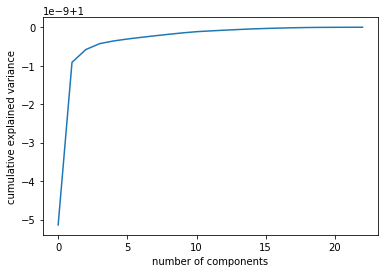

In [725]:
# Choosing the # of components
pca = PCA().fit(X_trainClassiSTD)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

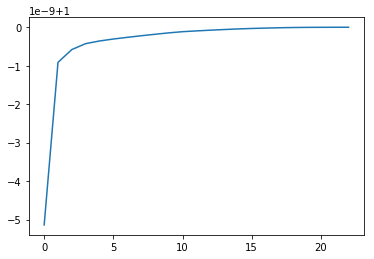

In [727]:
pca = PCA().fit(X_trainClassiSTD) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.show()

In [389]:
# From the graph, we will choose 5 components 

In [728]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
# From the url above:  PCA, as I understand it, identifies the features with the greatest variance in a dataset, 
# and can then use this quality of the dataset to create a smaller dataset with a minimal 
# loss of descriptive power. The advantages of a smaller dataset is that it requires less 
# processing power and should have less noise in the data. But the features of greatest variance 
# are not the "best" or "most important" features of a dataset, 
# insofar as such concepts can be said to exist at all.
pca=PCA(n_components=5)  
X_trainClassiPCA = pca.fit_transform(X_trainClassiSTD)
print(pcafit.explained_variance_ratio_)

[0.80970815 0.06340917 0.0346525  0.02063236 0.01251818 0.00970751
 0.00800065 0.00699031 0.00670338 0.0051026 ]


In [732]:
# Should only see 10 features or columns
print(X_trainClassiPCA.shape)

(750, 5)


In [733]:
# Should only see 10 features or columns
X_testClassiPCA = pca.transform(X_testClassiSTD)
print(X_testClassiPCA.shape)

(250, 5)


# Spot Check Models -- No Scaling Used to Transform Data

### Original data, not standardized

In [1122]:
# Test options and evaluation metric 
num_folds=10 
seed=7 
scoring= 'accuracy'

#Spot-CheckAlgorithms 
models=[] 
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier())) 
models.append(('NB',GaussianNB())) 
models.append(('SVM',SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier()))
models.append(('SGD',SGDClassifier()))

results=[] 
names=[] 
for name, model in models:
   kfold=KFold(n_splits=num_folds,random_state=seed) 
# also want to use kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=seed)
   cv_results=cross_val_score(model,X_trainClassi,y_trainClassi,cv=kfold,scoring=scoring) 
   results.append(cv_results) 
   names.append(name)
   msg="%s:%f(%f)"%( name,cv_results.mean(),cv_results.std()) 
   print("Mean and standard deviation of accuracy measure: ", msg)

Mean and standard deviation of accuracy measure:  KNN:0.765333(0.040089)
Mean and standard deviation of accuracy measure:  CART:0.700000(0.056332)
Mean and standard deviation of accuracy measure:  NB:0.437333(0.122027)
Mean and standard deviation of accuracy measure:  SVM:0.790667(0.040022)
Mean and standard deviation of accuracy measure:  RF:0.788000(0.034998)
Mean and standard deviation of accuracy measure:  SGD:0.684000(0.136763)


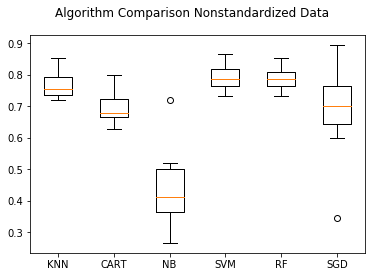

In [1123]:
#Compare Algorithms Using Box and Whisker Plots
# Compare accuracy across cross-validation fields
fig=plt.figure() 
fig.suptitle("Algorithm Comparison Nonstandardized Data") 
ax=fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [1124]:
creditExtraColsEdSTD

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade,defaulted
0,0.811187,0.275574,-1.058927,1.790109,1.773831,-0.698359,-0.668048,-1.528501,-1.486403,-0.640718,...,-0.652698,-0.340684,-0.225210,-0.295671,-0.306902,-0.314098,-0.293155,10000,20,yes
1,0.811187,0.275574,0.857702,-0.877180,1.773831,0.134384,0.184498,0.230896,1.983329,-0.657516,...,-0.597884,-0.340684,-0.211742,-0.238570,-0.243273,-0.314098,-0.179938,10000,20,yes
2,0.811187,0.275574,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.295134,...,-0.391334,-0.249223,-0.190091,-0.238570,-0.243273,-0.248443,-0.010113,10000,30,no
3,0.811187,0.275574,-1.058927,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.052913,...,-0.156042,-0.220182,-0.167616,-0.227150,-0.236910,-0.243913,-0.236547,10000,30,no
4,-1.232761,0.275574,-1.058927,-0.877180,0.107627,-0.698359,0.184498,0.230896,0.248463,-0.576530,...,-0.331125,-0.220182,1.333368,0.275338,0.265754,-0.268862,-0.254718,10000,50,no
5,-1.232761,-1.153869,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,0.184654,...,-0.316114,-0.190057,-0.176450,-0.258156,-0.243273,-0.248443,-0.247868,10000,30,no
6,-1.232761,-1.153869,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,4.326936,...,7.313831,2.973094,1.477093,1.874165,0.980873,0.588652,0.486343,410000,20,no
7,0.811187,0.275574,0.857702,0.011916,-0.725475,-0.698359,0.184498,0.230896,-0.618970,-0.532060,...,-0.643167,-0.317788,-0.229020,-0.295671,-0.269934,-0.203339,-0.205865,10000,20,no
8,0.811187,1.705016,-1.058927,0.011916,0.107627,1.799871,0.184498,0.230896,0.248463,-0.540124,...,-0.590185,-0.140110,-0.255046,-0.271004,-0.243273,-0.248443,-0.236547,10000,20,no
9,-1.232761,1.705016,0.857702,-1.766277,-1.558577,-1.531102,-1.520593,-0.648803,-0.618970,-0.694113,...,-0.418851,-0.340684,-0.255046,-0.295671,0.520712,-0.240434,-0.293155,10000,30,no


### Standardized Data

In [1125]:
# Test options and evaluation metric 
num_folds=10 
seed=7 
scoring= 'accuracy'

#Spot-CheckAlgorithms 
models=[] 
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier())) 
models.append(('NB',GaussianNB())) 
models.append(('SVM',SVC(gamma='auto')))
models.append(('RF',RandomForestClassifier()))
models.append(('SGD',SGDClassifier()))


resultsSTD=[] 
names=[] 
for name, model in models:
   kfold=KFold(n_splits=num_folds,random_state=seed) 
# also want to use kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=seed)
   cv_resultsSTD=cross_val_score(model,X_trainClassiSTD,y_trainClassiSTD,cv=kfold,scoring=scoring) 
   resultsSTD.append(cv_resultsSTD) 
   names.append(name)
   msg="%s:%f(%f)"%( name,cv_resultsSTD.mean(),cv_resultsSTD.std()) 
   print("Mean and standard deviation of accuracy measure: ", msg)

Mean and standard deviation of accuracy measure:  KNN:0.772000(0.049692)
Mean and standard deviation of accuracy measure:  CART:0.682667(0.067409)
Mean and standard deviation of accuracy measure:  NB:0.776000(0.043328)
Mean and standard deviation of accuracy measure:  SVM:0.778667(0.048516)
Mean and standard deviation of accuracy measure:  RF:0.774667(0.042771)
Mean and standard deviation of accuracy measure:  SGD:0.604000(0.263181)


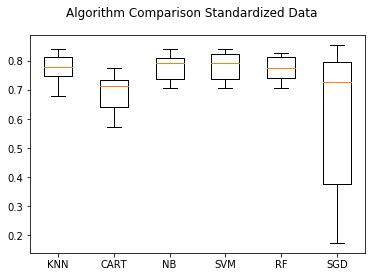

In [1126]:
#Compare Algorithms Using Box and Whisker Plots
# Compare accuracy across cross-validation fields
fig=plt.figure() 
fig.suptitle("Algorithm Comparison Standardized Data") 
ax=fig.add_subplot(111) 
plt.boxplot(resultsSTD) 
ax.set_xticklabels(names) 
plt.show()

# Classification--Model Building

## Models (non-tuned) Built Non-Standardized Data 

### Random Forest

In [1127]:
# Run initially with defaults.  If use num_trees and max_features the model's mean results are 1.0, overfit
num_trees=100 
max_features=3 
kfold=KFold(n_splits=10,random_state=7) 
#modelRF=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 
modelRF=RandomForestClassifier()
results=cross_val_score(modelRF,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.7746666666666666


In [1128]:
modelRF = modelRF.fit(X_trainClassi,y_trainClassi)
modelRF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1129]:
# more results from loaded model
print('The RF scores per cv split, score array, train, test: ', 
      cross_val_score(modelRF, X_trainClassi, y_trainClassi)) 

The RF scores per cv split, score array, train, test:  [0.79681275 0.796      0.78714859]


In [1130]:
# Make predictions using the test set
target_predRF = modelRF.predict(X_testClassi)

In [1131]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predRF, normalize = True)


0.768

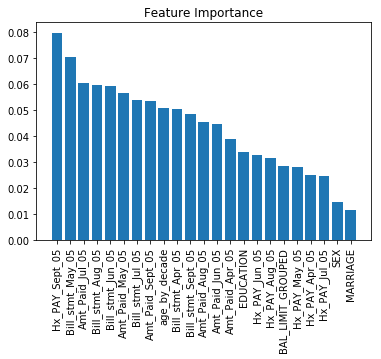

In [1132]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
# feature importance
importances = modelRF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [creditExtraColsEd.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassi.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassi.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [500]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFnon.sav'

In [502]:
# save model LR using pickle to .sav file
pickle.dump(modelRF, open(filename, 'wb'))

### SVM Support Vector Machine

In [1133]:
seed=7 
kfold=KFold(n_splits=10,random_state=seed) 
modelSVM=SVC(gamma='scale') 
results=cross_val_score(modelSVM,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.7866666666666665


In [1134]:
modelSVM = modelSVM.fit(X_trainClassi,y_trainClassi)
modelSVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1135]:
# R-squared is the default metric used by Sklearn.
result = modelSVM.score(X_testClassi, y_testClassi)
print(result)

0.768


In [1136]:
# more results from loaded model
print('The SVM scores per cv split, score array, train, test: ', 
      cross_val_score(modelSVM, X_trainClassi, y_trainClassi)) 

The SVM scores per cv split, score array, train, test:  [0.78486056 0.784      0.79116466]


In [1137]:
# Make predictions using the test set
target_predSVM = modelSVM.predict(X_testClassi)

In [1138]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predSVM, normalize = True)


0.768

In [509]:
# feature importance
# NOTE   sklearn currently provides model-based feature importances for tree-based models 
# and linear models. However, models such as e.g. SVM and kNN don't provide feature importances, 
# which could be useful.

importances = modelSVM.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [creditExtraColsEd.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassi.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassi.shape[1]), names, rotation=90)

# Show plot
plt.show()

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [ ]:
# save model 

In [510]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSVMnon.sav'

In [511]:
# save model LR using pickle to .sav file
pickle.dump(modelSVM, open(filename, 'wb'))

### KNN K-Nearest Neighbor

In [1139]:
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelKNN=KNeighborsClassifier(n_neighbors=3) 
results=cross_val_score(modelKNN,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.74


In [1140]:
modelKNN = modelKNN.fit(X_trainClassi,y_trainClassi)
modelKNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [1141]:
# more results from loaded model
print('The KNN scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNN, X_trainClassi, y_trainClassi)) 

The KNN scores per cv split, score array, train, test:  [0.74900398 0.768      0.71084337]


In [1142]:
# Make predictions using the test set
target_predKNN = modelKNN.predict(X_testClassi)

In [1143]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predKNN, normalize = True)


0.724

In [1153]:
# not available for KNN
# feature importance
importances = modelKNN.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [creditExtraColsEd.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassi.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassi.shape[1]), names, rotation=90)

# Show plot
#plt.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [ ]:
# save model 

In [518]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNnon.sav'

In [519]:
# save model LR using pickle to .sav file
pickle.dump(modelKNN, open(filename, 'wb'))

### Naive Bayes

In [1145]:
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelNB=GaussianNB() 
results=cross_val_score(modelNB,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.4373333333333333


In [1146]:
modelNB = modelNB.fit(X_trainClassi,y_trainClassi)
modelNB

GaussianNB(priors=None, var_smoothing=1e-09)

In [1147]:
# more results from loaded model
print('The NB scores per cv split, score array, train, test: ', 
      cross_val_score(modelNB, X_trainClassi, y_trainClassi)) 

The NB scores per cv split, score array, train, test:  [0.62151394 0.352      0.3373494 ]


In [1148]:
# Make predictions using the test set
target_predNB = modelNB.predict(X_testClassi)

In [1149]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predNB, normalize = True)


0.444

In [1152]:
# NB has no feature importance
# feature importance
importances = modelNB.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [creditExtraColsEd.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassi.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassi.shape[1]), names, rotation=90)

# Show plot
#plt.show()

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [ ]:
# save model . and look at regression steps

In [529]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNBnon.sav'

In [530]:
# save model LR using pickle to .sav file
pickle.dump(modelNB, open(filename, 'wb'))

### CART

In [1154]:
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelCART=DecisionTreeClassifier() 
results=cross_val_score(modelCART,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.6906666666666668


In [1155]:
modelCART = modelCART.fit(X_trainClassi,y_trainClassi)
modelCART

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1156]:
# more results from loaded model
print('The CART scores per cv split, score array, train, test: ', 
      cross_val_score(modelCART, X_trainClassi, y_trainClassi)) 

The CART scores per cv split, score array, train, test:  [0.70517928 0.732      0.69076305]


In [1157]:
# Make predictions using the test set
target_predCART = modelCART.predict(X_testClassi)

In [1158]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predCART, normalize = True)


0.72

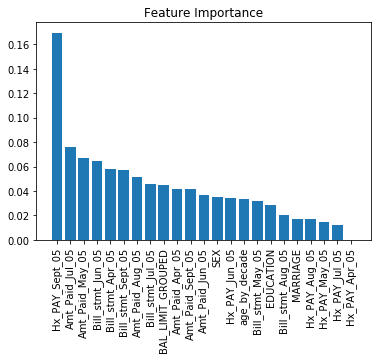

In [1159]:
# feature importance
importances = modelCART.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [creditExtraColsEd.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassi.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassi.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# save model 

In [539]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTnon.sav'

In [540]:
# save model LR using pickle to .sav file
pickle.dump(modelCART, open(filename, 'wb'))

## Models (non-tuned) Built Standardized Data

### Random Forest

In [1160]:
num_trees=100 
max_features=3 
kfold=KFold(n_splits=10,random_state=7) 
# modelRFSTD=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 
modelRFSTD=RandomForestClassifier() 
results=cross_val_score(modelRFSTD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.7813333333333332


In [1161]:
modelRFSTD = modelRFSTD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelRFSTD

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1162]:
# more results from loaded model
# uses stratified cross validation
print('The RFSTD scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFSTD, X_trainClassiSTD, y_trainClassiSTD)) 

The RFSTD scores per cv split, score array, train, test:  [0.77290837 0.792      0.7751004 ]


In [1163]:
# Make predictions using the test set
target_predRFSTD = modelRFSTD.predict(X_testClassiSTD)

In [1164]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predRFSTD, normalize = True)


0.792

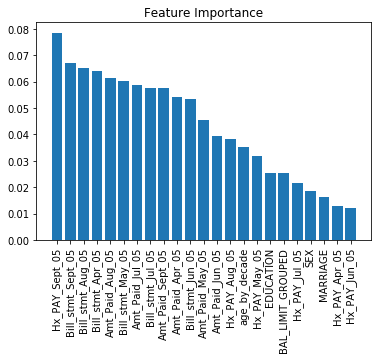

In [1165]:
# feature importance
importances = modelRFSTD.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [creditExtraColsEd.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassiSTD.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassiSTD.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# save model 

In [137]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFSTD.sav'

In [138]:
# save model LR using pickle to .sav file
pickle.dump(modelRFSTD, open(filename, 'wb'))

### SVM Support Vector Machine

In [1166]:
seed=7 
kfold=KFold(n_splits=10,random_state=seed) 
modelSVMSTD=SVC(gamma='scale') 
results=cross_val_score(modelSVMSTD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.7786666666666667


In [1167]:
modelSVMSTD = modelSVMSTD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelSVMSTD

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1168]:
# R-squared is the default metric used by Sklearn.
result = modelSVMSTD.score(X_testClassiSTD, y_testClassiSTD)
print(result)

0.804


In [1169]:
# more results from loaded model
print('The SVMSTD scores per cv split, score array, train, test: ', 
      cross_val_score(modelSVMSTD, X_trainClassiSTD, y_trainClassiSTD)) 

The SVMSTD scores per cv split, score array, train, test:  [0.77689243 0.78       0.77911647]


In [ ]:
# Make predictions using the test set
target_predSVMSTD = modelSVMSTD.predict(X_testClassiSTD)

In [1170]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predSVMSTD, normalize = True)


0.804

In [ ]:
# save model 

In [137]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSVMSTD.sav'

In [138]:
# save model LR using pickle to .sav file
pickle.dump(modelSVMSTD, open(filename, 'wb'))

### KNN K-Nearest Neighbor

In [1172]:
# The default value for the number of neighbors in KNN is 7.
seed=7
num_folds=10
kfold=KFold(n_splits=num_folds,random_state=seed) 
modelKNNSTD=KNeighborsClassifier(n_neighbors=3) 
results=cross_val_score(modelKNNSTD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.76


In [1173]:
modelKNNSTD = modelKNNSTD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelKNNSTD

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [1174]:
# R-squared is the default metric used by Sklearn.
result = modelKNNSTD.score(X_testClassiSTD, y_testClassiSTD)
print(result)

0.78


In [1175]:
# more results from loaded model
print('The KNNSTD scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNSTD, X_trainClassiSTD, y_trainClassiSTD)) 

The KNNSTD scores per cv split, score array, train, test:  [0.73306773 0.736      0.73493976]


In [1176]:
# Make predictions using the test set
target_predKNNSTD = modelKNNSTD.predict(X_testClassiSTD)

In [1177]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predKNNSTD, normalize = True)


0.78

In [ ]:
# save model 

In [137]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNSTD.sav'

In [138]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNSTD, open(filename, 'wb'))

### Naive Bayes

In [1179]:
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelNBSTD=GaussianNB() 
results=cross_val_score(modelNBSTD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.776


In [1180]:
modelNBSTD = modelNBSTD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelNBSTD

GaussianNB(priors=None, var_smoothing=1e-09)

In [1181]:
# more results from loaded model
print('The NBSTD scores per cv split, score array, train, test: ', 
      cross_val_score(modelNBSTD, X_trainClassiSTD, y_trainClassiSTD)) 

The NBSTD scores per cv split, score array, train, test:  [0.77290837 0.78       0.77911647]


In [1182]:
# Make predictions using the test set
target_predNBSTD = modelNBSTD.predict(X_testClassiSTD)

In [1183]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNBSTD, normalize = True)


0.8

In [ ]:
# save model 

In [137]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNBSTD.sav'

In [138]:
# save model LR using pickle to .sav file
pickle.dump(modelNBSTD, open(filename, 'wb'))

### CART

In [1185]:
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelCARTSTD=DecisionTreeClassifier() 
results=cross_val_score(modelCARTSTD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6893333333333334


In [1186]:
modelCARTSTD = modelCARTSTD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelCARTSTD

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1187]:
# more results from loaded model
print('The CART scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTSTD, X_trainClassiSTD, y_trainClassiSTD)) 

The CART scores per cv split, score array, train, test:  [0.71314741 0.684      0.70281124]


In [1188]:
# Make predictions using the test set
target_predCARTSTD = modelCARTSTD.predict(X_testClassiSTD)

In [1189]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predCARTSTD, normalize = True)


0.732

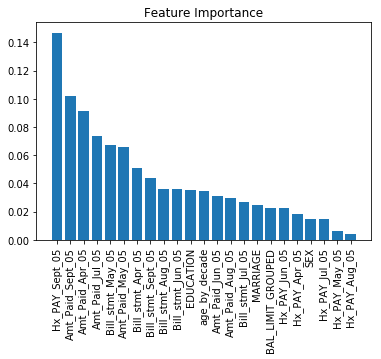

In [1190]:
# feature importance
importances = modelCARTSTD.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [creditExtraColsEd.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassiSTD.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassiSTD.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# save model 

In [137]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTSTD.sav'

In [138]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTSTD, open(filename, 'wb'))

## Models (non-tuned) Built with PCA and Standardized Data

In [ ]:
# The Y parameter used are named y_trainClassiSTD or y_testClassiSTD

### Random Forest

In [1191]:
num_trees=100 
max_features=3 
kfold=KFold(n_splits=10,random_state=7) 
modelRFPCA=RandomForestClassifier() 

#modelRFPCA=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 
results=cross_val_score(modelRFPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.7546666666666666


In [1192]:
modelRFPCA = modelRFPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelRFPCA

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1193]:
# more results from loaded model
# uses stratified cross validation
print('The RFPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The RFPCA scores per cv split, score array, train, test:  [0.75697211 0.764      0.75502008]


In [1194]:
# Make predictions using the test set
target_predRFPCA = modelRFPCA.predict(X_testClassiPCA)

In [1195]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predRFPCA, normalize = True)


0.788

In [1006]:
# save model 

In [1007]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFPCA.sav'

In [1008]:
# save model LR using pickle to .sav file
pickle.dump(modelRFPCA, open(filename, 'wb'))

### SVM Support Vector Machine

In [1196]:
seed=7 
kfold=KFold(n_splits=10,random_state=seed) 
modelSVMPCA=SVC(gamma='scale') 
results=cross_val_score(modelSVMPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.7786666666666667


In [1197]:
modelSVMPCA = modelSVMPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelSVMPCA

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1198]:
# more results from loaded model
print('The SVMPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelSVMPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The SVMPCA scores per cv split, score array, train, test:  [0.77689243 0.78       0.77911647]


In [1199]:
# Make predictions using the test set
target_predSVMPCA = modelSVMPCA.predict(X_testClassiPCA)

In [1200]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predSVMPCA, normalize = True)


0.804

In [ ]:
# save model 

In [413]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSVMPCA.sav'

In [414]:
# save model LR using pickle to .sav file
pickle.dump(modelSVMPCA, open(filename, 'wb'))

### KNN K-Nearest Neighbor

In [1201]:
# The default value for the number of neighbors in KNN is 7.
seed=7
num_folds=10
kfold=KFold(n_splits=num_folds,random_state=seed) 
modelKNNPCA=KNeighborsClassifier(n_neighbors=3) 
results=cross_val_score(modelKNNPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.7293333333333334


In [1202]:
modelKNNPCA = modelKNNPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelKNNPCA

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [1203]:
# more results from loaded model
print('The KNNPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The KNNPCA scores per cv split, score array, train, test:  [0.71314741 0.736      0.71084337]


In [1204]:
# Make predictions using the test set
target_predKNNPCA = modelKNNPCA.predict(X_testClassiPCA)

In [1205]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predKNNPCA, normalize = True)


0.752

In [ ]:
# save model

In [442]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNPCA.sav'

In [443]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNPCA, open(filename, 'wb'))

### Naive Bayes

In [1206]:
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelNBPCA=GaussianNB() 
results=cross_val_score(modelNBPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.776


In [1207]:
modelNBPCA = modelNBPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelNBPCA

GaussianNB(priors=None, var_smoothing=1e-09)

In [1208]:
# more results from loaded model
print('The NBPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelNBPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The NBPCA scores per cv split, score array, train, test:  [0.77290837 0.78       0.77911647]


In [1209]:
# Make predictions using the test set
target_predNBPCA = modelNBPCA.predict(X_testClassiPCA)

In [1210]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNBPCA, normalize = True)


0.804

In [ ]:
# save model 

In [429]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNBPCA.sav'

In [430]:
# save model LR using pickle to .sav file
pickle.dump(modelNBPCA, open(filename, 'wb'))

### CART

In [1211]:
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelCARTPCA=DecisionTreeClassifier() 
results=cross_val_score(modelCARTPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.692


In [1212]:
modelCARTPCA = modelCARTPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelCARTPCA

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1213]:
# more results from loaded model
print('The CARTPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The CARTPCA scores per cv split, score array, train, test:  [0.64143426 0.644      0.72690763]


In [1214]:
# Make predictions using the test set
target_predCARTPCA = modelCARTPCA.predict(X_testClassiPCA)

In [1215]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predCARTPCA, normalize = True)


0.704

In [ ]:
# save model 

In [445]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTPCA.sav'

In [446]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTPCA, open(filename, 'wb'))

## Models (tuned) Built Standardized Data

### Random Forest Tuned

In [ ]:
# tune using Random Search and changing number of trees to 100, set random_state is 42

In [1216]:
#https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv

num_trees=100 

max_features=3 
kfold=KFold(n_splits=10,random_state=7) 
#modelRFSTDTun=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 

modelRFSTDTun=RandomForestClassifier(random_state=42)

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gridRF = GridSearchCV(estimator=modelRFSTDTun, param_grid=param_grid, cv= 5)
results=cross_val_score(gridRF,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())


0.784


In [1217]:
modelRFSTDTun = gridRF.fit(X_trainClassiSTD,y_trainClassiSTD)
modelRFSTDTun

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1218]:
# more results from loaded model
print('The RFSTDTun (tuned) scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFSTDTun, X_trainClassiSTD, y_trainClassiSTD,cv=kfold)) 

The RFSTDTun (tuned) scores per cv split, score array, train, test:  [0.85333333 0.74666667 0.84       0.84       0.72       0.81333333
 0.74666667 0.8        0.73333333 0.74666667]


In [1221]:
# Make predictions using the test set
target_predRFSTDTun = modelRFSTDTun.predict(X_testClassiSTD)

In [1222]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predRFSTDTun, normalize = True)


0.8

In [ ]:
# 'GridSearchCV' object has no attribute 'feature_importances_'

In [ ]:
# save model 

In [1020]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFSTDTun.sav'

In [1021]:
# save model LR using pickle to .sav file
pickle.dump(modelRFSTDTun, open(filename, 'wb'))

### SVM Support Vector Machine Tuned

In [1223]:
# Designate distributions to sample hyperparameters from 
# https://cambridgecoding.wordpress.com/2016/05/16/expanding-your-machine-learning-toolkit-randomized-search-computational-budgets-and-new-algorithms-2/
np.random.seed(123)
g_range = np.random.uniform(0.0, 0.3, 5).astype(float)
C_range = np.random.normal(1, 0.1, 5).astype(float)
 
# Check that gamma>0 and C>0 
C_range[C_range < 0] = 0.0001
 
hyperparameters = {'gamma': list(g_range), 
                    'C': list(C_range)}
 
print (hyperparameters)

# Run randomized search
modelSVMSTDTuned = RandomizedSearchCV(SVC(gamma='auto' ), param_distributions=hyperparameters, n_iter=20)


{'gamma': [0.2089407556793585, 0.08584180048511383, 0.06805543606926093, 0.16539443072486737, 0.2158406909356689], 'C': [1.0322106068339623, 0.9948482279060615, 0.9795799035361106, 1.197934843277785, 0.8380699934963254]}


In [1224]:
modelSVMSTDTuned.fit(X_trainClassiSTD, y_trainClassiSTD)
 
# Identify optimal hyperparameter values
best_gamma  = modelSVMSTDTuned.best_params_['gamma']
#best_C      = randomCV.best_params_['C']
 
print("The best performing gamma value is: {:5.2f}".format(best_gamma))

The best performing gamma value is:  0.17


In [1225]:
# more results from loaded model
# cross validation training score
print('The SVMSTDTuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelSVMSTDTuned, X_trainClassiSTD, y_trainClassiSTD)) 

The SVMSTDTuned scores per cv split, score array, train, test:  [0.79282869 0.784      0.78313253]


In [1227]:
# Make predictions using the test set
target_predSVMSTDTuned = modelSVMSTDTuned.predict(X_testClassiSTD)

In [1228]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predSVMSTDTuned, normalize = True)


0.812

In [137]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSVMSTDTuned.sav'

In [138]:
# save model LR using pickle to .sav file
pickle.dump(modelSVMSTDTuned, open(filename, 'wb'))

### KNN K-Nearest Neighbor Tuned

In [1238]:
# Tuned by using GridSearchCV and also adding a list of values for neighbors to try
scoring = 'accuracy'
seed=7
num_folds=10
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
modelKNNSTDTun=KNeighborsClassifier() 

kfold=KFold(n_splits=num_folds,random_state=seed) 
gridKNNSTD = GridSearchCV(estimator=modelKNNSTDTun, param_grid=param_grid, scoring=scoring, cv=kfold,
    iid=True)

In [1239]:
modelKNNSTDTun = gridKNNSTD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelKNNSTDTun

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1240]:
# more results from loaded model
# cross validation training score
print('The KNNSTDTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNSTDTun, X_trainClassiSTD, y_trainClassiSTD)) 

The KNNSTDTun scores per cv split, score array, train, test:  [0.76494024 0.784      0.75502008]


In [1241]:
# more results from loaded model invluding kfold
results=cross_val_score(modelKNNSTDTun,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())
print('The KNNSTDTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNSTDTun, X_trainClassiSTD, y_trainClassiSTD,cv=kfold)) 

0.776
The KNNSTDTun scores per cv split, score array, train, test:  [0.8        0.76       0.84       0.78666667 0.70666667 0.81333333
 0.77333333 0.81333333 0.72       0.74666667]


In [1242]:
# Make predictions using the test set
target_predKNNSTDTuned = modelKNNSTDTun.predict(X_testClassiSTD)

In [1243]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predKNNSTDTuned, normalize = True)


0.808

In [1234]:
# save model 

In [137]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNSTDTun.sav'

In [138]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNSTDTun, open(filename, 'wb'))

### Naive Bayes Tuned

In [ ]:
# Naive Bayes has few options for parameter smoothing 
# Various sites recommend looking at feature selection and pre-processing
# For example:  https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
# Unable to get GridSearch and RandomSearch tuning to work with NB
# ONLY ONE PARAMETER CHANGED is priors

In [1244]:
# https://stackoverflow.com/questions/30896367/how-to-specify-the-prior-probability-for-scikit-learns-naive-bayes
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelNBSTDTuned=GaussianNB(priors=[0.1, 0.9])#, var_smoothing=1e-09) 
results=cross_val_score(modelNBSTDTuned,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.22133333333333333


In [1245]:
modelNBSTDTuned = modelNBSTDTuned.fit(X_trainClassiSTD,y_trainClassiSTD)
modelNBSTDTuned

GaussianNB(priors=[0.1, 0.9], var_smoothing=1e-09)

In [1246]:
# more results from loaded model
print('The NBSTDTuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelNBSTDTuned, X_trainClassiSTD, y_trainClassiSTD,cv=kfold)) 

The NBSTDTuned scores per cv split, score array, train, test:  [0.18666667 0.25333333 0.14666667 0.2        0.29333333 0.18666667
 0.21333333 0.17333333 0.29333333 0.26666667]


In [1247]:
# Make predictions using the test set
target_predNBSTDTuned = modelNBSTDTuned.predict(X_testClassiSTD)

In [1248]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNBSTDTuned, normalize = True)

0.196

In [ ]:
# save model 

In [1069]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNBSTDTuned.sav'

In [1070]:
# save model LR using pickle to .sav file
pickle.dump(modelNBSTDTuned, open(filename, 'wb'))

### CART Tuned

In [ ]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# https://s3.amazonaws.com/assets.datacamp.com/production/course_6280/slides/chapter5.pdf

In [1249]:
# Tune parameters and use Grid Search
CARTSTDTuned=DecisionTreeClassifier(criterion="entropy", max_depth=3) 

params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

CARTSTDTuned = GridSearchCV(estimator=CARTSTDTuned,
param_grid=params_dt,
scoring='accuracy'
,
cv=10,
n_jobs=-1)

results=cross_val_score(CARTSTDTuned,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.7653333333333334


In [1250]:
modelCARTSTDTuned = CARTSTDTuned.fit(X_trainClassiSTD,y_trainClassiSTD)
modelCARTSTDTuned

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features': [0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1251]:
# more results from loaded model
print('The CART scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTSTDTuned, X_trainClassiSTD, y_trainClassiSTD)) 

The CART scores per cv split, score array, train, test:  [0.72111554 0.768      0.79116466]


In [1252]:
# Make predictions using the test set
target_predCARTSTDTuned = modelCARTSTDTuned.predict(X_testClassiSTD)

In [1253]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predCARTSTDTuned, normalize = True)


0.852

In [ ]:
# save model 

In [1097]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTSTDTuned.sav'

In [1098]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTSTDTuned, open(filename, 'wb'))

## Models (tuned) Built with PCA and Standardized Data

### Random Forest Tuned

In [ ]:
# tune using Random Search and changing number of trees to 100, set random_state is 42

In [1254]:
#https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv

num_trees=100 

max_features=3 
kfold=KFold(n_splits=10,random_state=7) 
#modelRFSTDTun=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 

modelRFPCATun=RandomForestClassifier(random_state=42)

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gridRF = GridSearchCV(estimator=modelRFPCATun, param_grid=param_grid, cv= 5)
results=cross_val_score(gridRF,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())


0.772


In [1255]:
modelRFPCATun = gridRF.fit(X_trainClassiPCA,y_trainClassiSTD)
modelRFPCATun


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1256]:
# more results from loaded model
print('The RFPCATun (tuned) scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFPCATun, X_trainClassiPCA, y_trainClassiSTD,cv=kfold)) 

The RFPCATun (tuned) scores per cv split, score array, train, test:  [0.81333333 0.70666667 0.82666667 0.8        0.69333333 0.81333333
 0.78666667 0.82666667 0.70666667 0.74666667]


In [1257]:
# Make predictions using the test set
target_predRFPCATun = modelRFPCATun.predict(X_testClassiPCA)

In [1258]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predRFPCATun, normalize = True)


0.804

In [ ]:
# 'GridSearchCV' object has no attribute 'feature_importances_'

In [ ]:
# save model 

In [1259]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFPCATun.sav'

In [1260]:
# save model LR using pickle to .sav file
pickle.dump(modelRFPCATun, open(filename, 'wb'))

### SVM Support Vector Machine Tuned

In [1261]:
# Designate distributions to sample hyperparameters from 
# https://cambridgecoding.wordpress.com/2016/05/16/expanding-your-machine-learning-toolkit-randomized-search-computational-budgets-and-new-algorithms-2/
np.random.seed(123)
g_range = np.random.uniform(0.0, 0.3, 5).astype(float)
C_range = np.random.normal(1, 0.1, 5).astype(float)
 
# Check that gamma>0 and C>0 
C_range[C_range < 0] = 0.0001
 
hyperparameters = {'gamma': list(g_range), 
                    'C': list(C_range)}
 
print (hyperparameters)

# Run randomized search
modelSVMPCATuned = RandomizedSearchCV(SVC(gamma='auto' ), param_distributions=hyperparameters, n_iter=20)


{'gamma': [0.2089407556793585, 0.08584180048511383, 0.06805543606926093, 0.16539443072486737, 0.2158406909356689], 'C': [1.0322106068339623, 0.9948482279060615, 0.9795799035361106, 1.197934843277785, 0.8380699934963254]}


In [1262]:
modelSVMPCATuned.fit(X_trainClassiPCA, y_trainClassiSTD)
 
# Identify optimal hyperparameter values
best_gamma  = modelSVMPCATuned.best_params_['gamma']
#best_C      = randomCV.best_params_['C']
 
print("The best performing gamma value is: {:5.2f}".format(best_gamma))

The best performing gamma value is:  0.22


In [1264]:
# more results from loaded model
# cross validation training score
print('The SVMPCATuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelSVMPCATuned, X_trainClassiPCA, y_trainClassiSTD)) 

The SVMPCATuned scores per cv split, score array, train, test:  [0.76494024 0.768      0.75100402]


In [1265]:
# Make predictions using the test set
target_predSVMPCATuned = modelSVMPCATuned.predict(X_testClassiPCA)

In [1267]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predSVMPCATuned, normalize = True)


0.796

In [1268]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSVMPCATuned.sav'

In [1269]:
# save model LR using pickle to .sav file
pickle.dump(modelSVMPCATuned, open(filename, 'wb'))

### KNN K-Nearest Neighbor Tuned

In [1270]:
# Tuned by using GridSearchCV and also adding a list of values for neighbors to try
scoring = 'accuracy'
seed=7
num_folds=10
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
modelKNNPCATun=KNeighborsClassifier() 

kfold=KFold(n_splits=num_folds,random_state=seed) 
gridKNNPCA = GridSearchCV(estimator=modelKNNPCATun, param_grid=param_grid, scoring=scoring, cv=kfold,
    iid=True)

In [1271]:
modelKNNPCATun = gridKNNPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelKNNPCATun

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1272]:
# R-squared is the default metric used by Sklearn.
result = modelKNNPCATun.score(X_testClassiPCA, y_testClassiSTD)
print(result)

0.816


In [1273]:
# more results from loaded model
# cross validation training score
print('The KNNPCATun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNPCATun, X_trainClassiPCA, y_trainClassiSTD)) 

The KNNPCATun scores per cv split, score array, train, test:  [0.78087649 0.784      0.76305221]


In [1275]:
# more results from loaded model invluding kfold
# results=cross_val_score(modelKNNPCATun,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())
print('The KNNPCATun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNPCATun, X_trainClassiPCA, y_trainClassiSTD,cv=kfold)) 

0.772
The KNNPCATun scores per cv split, score array, train, test:  [0.81333333 0.74666667 0.82666667 0.8        0.72       0.8
 0.76       0.84       0.72       0.74666667]


In [1278]:
# Make predictions using the test set
target_predKNNPCATuned = modelKNNPCATun.predict(X_testClassiPCA)

In [1279]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predKNNPCATuned, normalize = True)


0.816

In [1280]:
# save model 

In [1281]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNPCATun.sav'

In [1282]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNPCATun, open(filename, 'wb'))

### Naive Bayes Tuned

In [ ]:
# Naive Bayes has few options for parameter smoothing 
# Various sites recommend looking at feature selection and pre-processing
# For example:  https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
# Unable to get GridSearch and RandomSearch tuning to work with NB
# ONLY ONE PARAMETER CHANGED is priors

In [1283]:
# https://stackoverflow.com/questions/30896367/how-to-specify-the-prior-probability-for-scikit-learns-naive-bayes
seed=7
kfold=KFold(n_splits=10,random_state=seed) 
modelNBPCATuned=GaussianNB(priors=[0.1, 0.9])#, var_smoothing=1e-09) 
results=cross_val_score(modelNBPCATuned,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.22133333333333333


In [1287]:
modelNBPCATuned = modelNBPCATuned.fit(X_trainClassiPCA,y_trainClassiSTD)
modelNBPCATuned


GaussianNB(priors=[0.1, 0.9], var_smoothing=1e-09)

In [1289]:
# more results from loaded model
print('The NBSTDTuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelNBPCATuned, X_trainClassiPCA, y_trainClassiSTD,cv=kfold)) 

The NBSTDTuned scores per cv split, score array, train, test:  [0.18666667 0.25333333 0.14666667 0.2        0.29333333 0.18666667
 0.21333333 0.17333333 0.29333333 0.26666667]


In [1290]:
# Make predictions using the test set
target_predNBPCATuned = modelNBPCATuned.predict(X_testClassiPCA)

In [1291]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNBPCATuned, normalize = True)


0.196

In [ ]:
# save model 

In [1292]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNBPCATuned.sav'

In [1293]:
# save model LR using pickle to .sav file
pickle.dump(modelNBPCATuned, open(filename, 'wb'))

### CART Tuned

In [ ]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# https://s3.amazonaws.com/assets.datacamp.com/production/course_6280/slides/chapter5.pdf

In [1294]:
# Tune parameters and use Grid Search
CARTSTDTuned=DecisionTreeClassifier(criterion="entropy", max_depth=3) 

params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

CARTPCATuned = GridSearchCV(estimator=CARTSTDTuned,
param_grid=params_dt,
scoring='accuracy'
,
cv=10,
n_jobs=-1)

results=cross_val_score(CARTPCATuned,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.7706666666666668


In [1295]:
modelCARTPCATuned = CARTPCATuned.fit(X_trainClassiPCA,y_trainClassiSTD)
modelCARTPCATuned

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features': [0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1296]:
# more results from loaded model
print('The CART scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTPCATuned, X_trainClassiPCA, y_trainClassiSTD)) 

The CART scores per cv split, score array, train, test:  [0.77689243 0.772      0.77911647]


In [1297]:
# Make predictions using the test set
target_predCARTPCATuned = modelCARTPCATuned.predict(X_testClassiPCA)

In [1307]:
# Compare the model’s prediction with actual target values for the test set
accuracyScoreCARTPCATuned = accuracy_score(y_testClassiSTD, target_predCARTPCATuned, normalize = True)
accuracyScoreCARTPCATuned

0.804

In [1299]:
# save model 

In [1300]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTPCATuned.sav'

In [1301]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTPCATuned, open(filename, 'wb'))

# Compare Model Outputs Using scikit-learn

## Compare Models (non-tuned) Built with Non-Standardized Data

RandomForestClassifier
 Confusion Matrix :
[[184   8]
 [ 50   8]] 



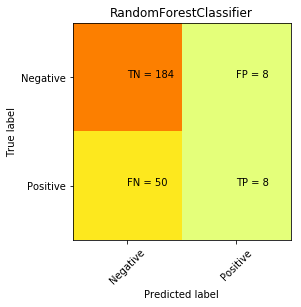

SVM
 Confusion Matrix :
[[192   0]
 [ 58   0]] 



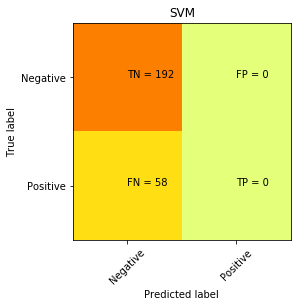

KNN
 Confusion Matrix :
[[171  21]
 [ 48  10]] 



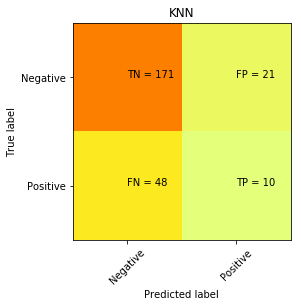

CART
 Confusion Matrix :
[[157  35]
 [ 35  23]] 



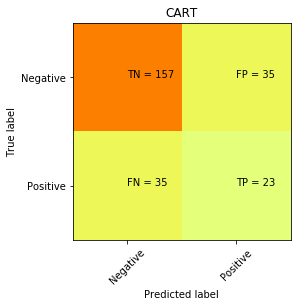

GaussianNB
 Confusion Matrix :
[[ 60 132]
 [  7  51]] 



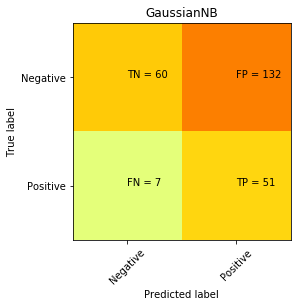

RandomForestClassifier Accuracy Score :  0.768 

SVM Accuracy Score :  0.768 

KNN Accuracy Score :  0.724 

CART Accuracy Score :  0.72 

GaussianNB Accuracy Score :  0.444 


 The models classification report of  RandomForestClassifier is: 
               precision    recall  f1-score   support

          no       0.79      0.96      0.86       192
         yes       0.50      0.14      0.22        58

   micro avg       0.77      0.77      0.77       250
   macro avg       0.64      0.55      0.54       250
weighted avg       0.72      0.77      0.71       250
 


 The models classification report of  SVM is: 
               precision    recall  f1-score   support

          no       0.77      1.00      0.87       192
         yes       0.00      0.00      0.00        58

   micro avg       0.77      0.77      0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250
 


 The models classification report of  KNN is: 
 

In [1402]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRF))
models.append(('SVM',modelSVM))
models.append(('KNN',modelKNN))
models.append(('CART',modelCART))
models.append(('GaussianNB',modelNB))

# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
names = []
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    matrix = confusion_matrix(y_testClassi, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title( name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()
    
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassi, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    report = classification_report(y_testClassi, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

## Compare Models (non-tuned) Built with Standardized Data

RandomForestClassifier
 Confusion Matrix :
[[188  13]
 [ 39  10]] 



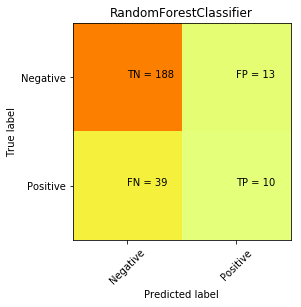

SVM
 Confusion Matrix :
[[201   0]
 [ 49   0]] 



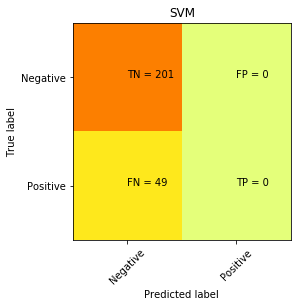

KNN
 Confusion Matrix :
[[185  16]
 [ 39  10]] 



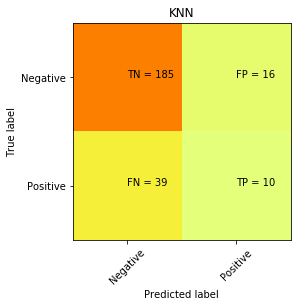

CART
 Confusion Matrix :
[[156  45]
 [ 22  27]] 



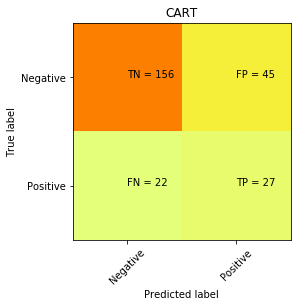

GaussianNB
 Confusion Matrix :
[[200   1]
 [ 49   0]] 



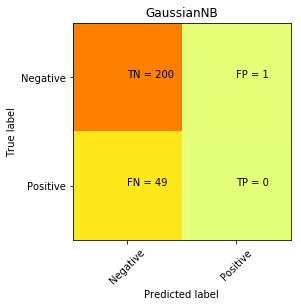

RandomForestClassifier Accuracy Score :  0.792 

SVM Accuracy Score :  0.804 

KNN Accuracy Score :  0.78 

CART Accuracy Score :  0.732 

GaussianNB Accuracy Score :  0.8 


 The models classification report of  RandomForestClassifier is: 
               precision    recall  f1-score   support

          no       0.83      0.94      0.88       201
         yes       0.43      0.20      0.28        49

   micro avg       0.79      0.79      0.79       250
   macro avg       0.63      0.57      0.58       250
weighted avg       0.75      0.79      0.76       250
 


 The models classification report of  SVM is: 
               precision    recall  f1-score   support

          no       0.80      1.00      0.89       201
         yes       0.00      0.00      0.00        49

   micro avg       0.80      0.80      0.80       250
   macro avg       0.40      0.50      0.45       250
weighted avg       0.65      0.80      0.72       250
 


 The models classification report of  KNN is: 
   

In [1403]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFSTD))
models.append(('SVM',modelSVMSTD))
models.append(('KNN',modelKNNSTD))
models.append(('CART',modelCARTSTD))
models.append(('GaussianNB',modelNBSTD))

names = []
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    matrix = confusion_matrix(y_testClassiSTD, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title( name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()
    
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassiSTD, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    report = classification_report(y_testClassiSTD, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

## Compare Models non-tuned) Built with Standardized Data and PCA

RandomForestClassifier
 Confusion Matrix :
[[189  12]
 [ 41   8]] 



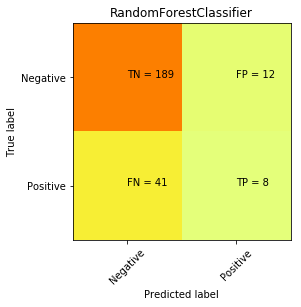

SVM
 Confusion Matrix :
[[201   0]
 [ 49   0]] 



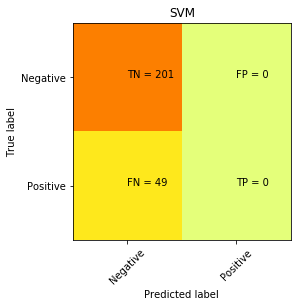

KNN
 Confusion Matrix :
[[180  21]
 [ 41   8]] 



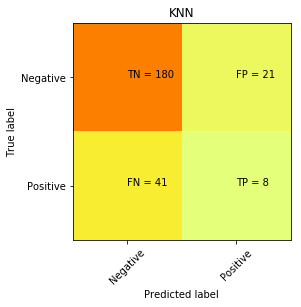

CART
 Confusion Matrix :
[[158  43]
 [ 31  18]] 



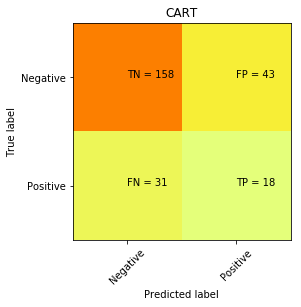

GaussianNB
 Confusion Matrix :
[[201   0]
 [ 49   0]] 



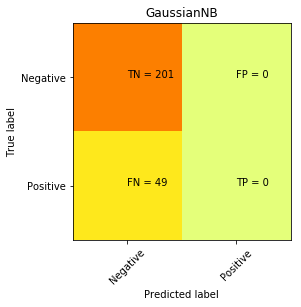

RandomForestClassifier Accuracy Score :  0.788 

SVM Accuracy Score :  0.804 

KNN Accuracy Score :  0.752 

CART Accuracy Score :  0.704 

GaussianNB Accuracy Score :  0.804 


 The models classification report of  RandomForestClassifier is: 
               precision    recall  f1-score   support

          no       0.82      0.94      0.88       201
         yes       0.40      0.16      0.23        49

   micro avg       0.79      0.79      0.79       250
   macro avg       0.61      0.55      0.55       250
weighted avg       0.74      0.79      0.75       250
 


 The models classification report of  SVM is: 
               precision    recall  f1-score   support

          no       0.80      1.00      0.89       201
         yes       0.00      0.00      0.00        49

   micro avg       0.80      0.80      0.80       250
   macro avg       0.40      0.50      0.45       250
weighted avg       0.65      0.80      0.72       250
 


 The models classification report of  KNN is: 


In [1404]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFPCA))
models.append(('SVM',modelSVMPCA))
models.append(('KNN',modelKNNPCA))
models.append(('CART',modelCARTPCA))
models.append(('GaussianNB',modelNBPCA))

names = []
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    matrix = confusion_matrix(y_testClassiSTD, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title( name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassiSTD, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    report = classification_report(y_testClassiSTD, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

## Compare Models (tuned) Built with Standardized Data

RandomForestClassifier
 Confusion Matrix :
[[193   8]
 [ 42   7]] 



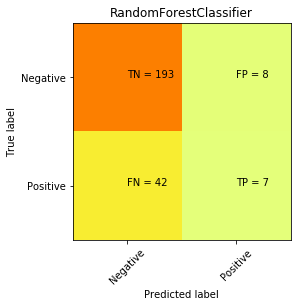

SVM
 Confusion Matrix :
[[198   3]
 [ 44   5]] 



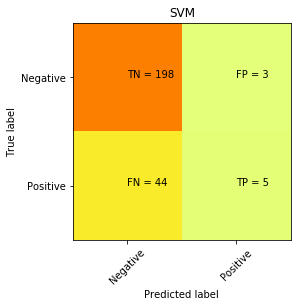

KNN
 Confusion Matrix :
[[198   3]
 [ 45   4]] 



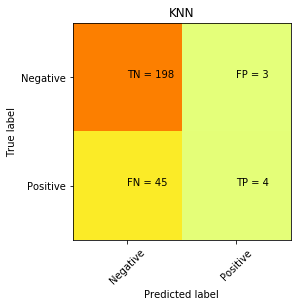

CART
 Confusion Matrix :
[[193   8]
 [ 29  20]] 



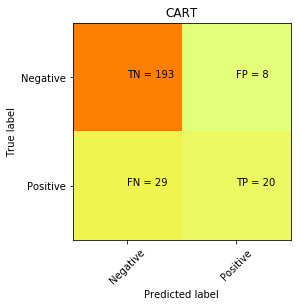

RandomForestClassifier Accuracy Score :  0.8 

SVM Accuracy Score :  0.812 

KNN Accuracy Score :  0.808 

CART Accuracy Score :  0.852 


 The models classification report of  RandomForestClassifier is: 
               precision    recall  f1-score   support

          no       0.82      0.96      0.89       201
         yes       0.47      0.14      0.22        49

   micro avg       0.80      0.80      0.80       250
   macro avg       0.64      0.55      0.55       250
weighted avg       0.75      0.80      0.75       250
 


 The models classification report of  SVM is: 
               precision    recall  f1-score   support

          no       0.82      0.99      0.89       201
         yes       0.62      0.10      0.18        49

   micro avg       0.81      0.81      0.81       250
   macro avg       0.72      0.54      0.53       250
weighted avg       0.78      0.81      0.75       250
 


 The models classification report of  KNN is: 
               precision    recall  f1-

In [1407]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFSTDTun))
models.append(('SVM',modelSVMSTDTuned))
models.append(('KNN',modelKNNSTDTun))
models.append(('CART',modelCARTSTDTuned))
# initial results too poor to include
# models.append(('GaussianNB',modelNBSTDTuned))

names = []
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    matrix = confusion_matrix(y_testClassiSTD, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title( name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()
    
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassiSTD, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    report = classification_report(y_testClassiSTD, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

## Compare Models (tuned) Built with Standardized Data and PCA

RandomForestClassifier
 Confusion Matrix :
[[193   8]
 [ 41   8]] 



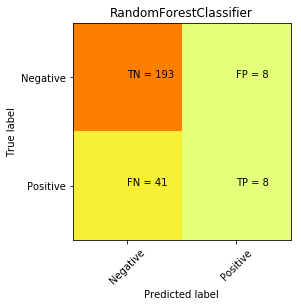

SVM
 Confusion Matrix :
[[198   3]
 [ 48   1]] 



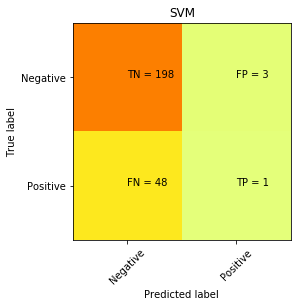

KNN
 Confusion Matrix :
[[195   6]
 [ 40   9]] 



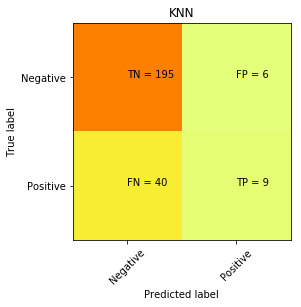

CART
 Confusion Matrix :
[[201   0]
 [ 49   0]] 



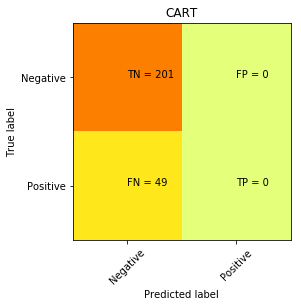

RandomForestClassifier Accuracy Score :  0.804 

SVM Accuracy Score :  0.796 

KNN Accuracy Score :  0.816 

CART Accuracy Score :  0.804 


 The models classification report of  RandomForestClassifier is: 
               precision    recall  f1-score   support

          no       0.82      0.96      0.89       201
         yes       0.50      0.16      0.25        49

   micro avg       0.80      0.80      0.80       250
   macro avg       0.66      0.56      0.57       250
weighted avg       0.76      0.80      0.76       250
 


 The models classification report of  SVM is: 
               precision    recall  f1-score   support

          no       0.80      0.99      0.89       201
         yes       0.25      0.02      0.04        49

   micro avg       0.80      0.80      0.80       250
   macro avg       0.53      0.50      0.46       250
weighted avg       0.70      0.80      0.72       250
 


 The models classification report of  KNN is: 
               precision    recall  f

In [1410]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFPCATun))
models.append(('SVM',modelSVMPCATuned))
models.append(('KNN',modelKNNPCATun))
models.append(('CART',modelCARTPCATuned))
# NB excluded due to low accuracy
#models.append(('GaussianNB',modelNBPCATuned))

names = []
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    matrix = confusion_matrix(y_testClassiSTD, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title( name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassiSTD, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    report = classification_report(y_testClassiSTD, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

## Compare Top Models

In [ ]:
# Examine AUC curve for the two top models
# We want AUC greater than 0.5
# Will also consider previous metrics rendered

In [1436]:
# Tune parameters and use Grid Search
# Look at the AUC values for CART
CARTSTDTunedAuc=DecisionTreeClassifier(criterion="entropy", max_depth=3) 

params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

CARTSTDTunedAuc = GridSearchCV(estimator=CARTSTDTuned,
param_grid=params_dt,
scoring='roc_auc'
,
cv=10,
n_jobs=-1)

resultsA=cross_val_score(CARTSTDTunedAuc,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 

print("CART AUC: %.3f (%.3f)" % (resultsA.mean(), resultsA.std()))

AUC: 0.673 (0.072)


In [1483]:
#Using this approach https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#fpr = the false positive rate (FP / (FP + TN)) for each threshold
#tpr = the true positive rate (TP / (TP + FN)) for each threshold


#x = # false_positive_rate
#y = # true_positive_rate 

# This is the ROC curve
#plt.plot(x,y)
#plt.show() 

# This is the AUC
#auc = np.trapz(y,x)

#CART matrix  
#[[193   8]
#[ 29  20]] 


CART_fpr = (8 / (8 + 193))
CART_tpr = (20 / (20 + 29)) 

# played with some graphing but did not use

In [1485]:
# Tuned by using GridSearchCV and also adding a list of values for neighbors to try
scoring = 'roc_auc'
seed=7
num_folds=10
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
modelKNNPCATun=KNeighborsClassifier() 

kfold=KFold(n_splits=num_folds,random_state=seed) 
gridKNNPCA = GridSearchCV(estimator=modelKNNPCATun, param_grid=param_grid, scoring=scoring, cv=kfold,
    iid=True)

resultsAU=cross_val_score(modelKNNPCATun, X_trainClassiPCA, y_trainClassiSTD,cv=kfold)
print("KNN AUC: %.3f (%.3f)" % (resultsAU.mean(), resultsAU.std()))




KNN AUC: 0.761 (0.055)


In [1484]:
#KNN matrix
# [[195   6]
# [ 40   9]] 


KNN_fpr = (6 / (6 + 195))
KNN_tpr = (9 / (9 + 40)) 

# played with some graphing but did not use

# Best Model

In [ ]:
# CART model based on standardized data with model tuning had the highest accuracy metrics.  
# The second place model was KNN built on standardized with PCA and model tuning. 
# CART was chosen as it had:
#  Higher precision scores
#  Higher F1 scores
#  Higher accuracy score
#  Best recall, but neither model had a score above 0.5 correctly labeling who will default.  CART was better 
#    than KNN though.  We have a high likelihood of correctly identifying who will not default, however. 
# KNN: Had Higher AUC
# Take away—we have higher confidence in predicting who will not default 
#    than we have predicting who will default based on recall and precision



### CART - Top Model - Using Standardized Data with Model Tuning

In [1481]:
# https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

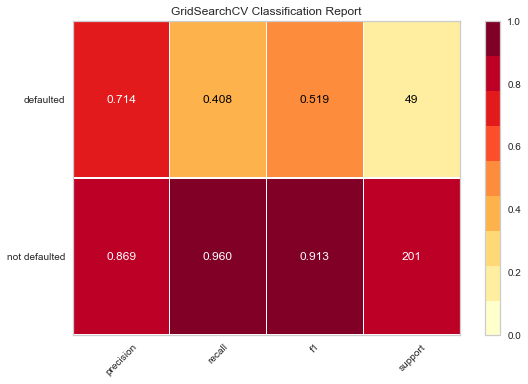

In [1578]:
classes = ["not defaulted", "defaulted"]
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelCARTSTDTuned, classes=classes, support=True)

visualizer.fit(X_trainClassiSTD, y_trainClassiSTD)  # Fit the visualizer and the model
visualizer.score(X_testClassiSTD, y_testClassiSTD)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [1570]:
# Count the number of yes and no values that are returned
D = dict(zip(*np.unique(target_predCARTSTDTuned, return_counts=True)))
print(D)


{'no': 222, 'yes': 28}


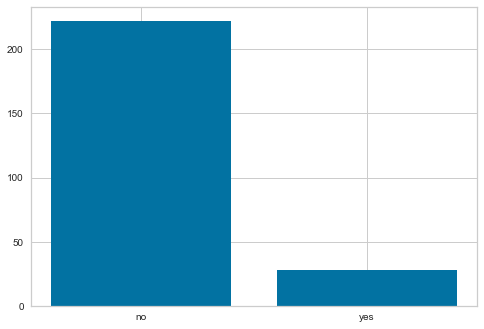

In [1571]:
# graph the number of yes and no values returned
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

plt.show()

### KNN-- Second Place  Using Standardized Data with PCA and Model Tuning

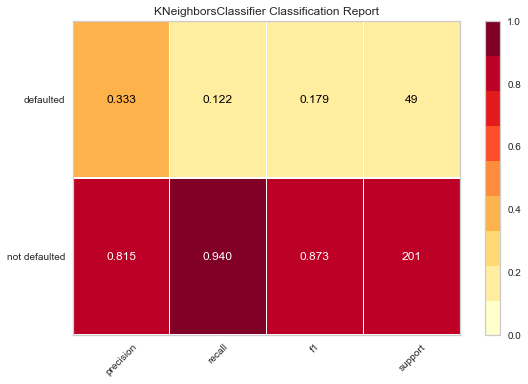

In [1477]:
#KNN
classes = ["not defaulted", "defaulted"]
# Instantiate the classification model and visualizer

visualizerK = ClassificationReport(modelKNNPCATun, classes=classes, support=True)

visualizerK.fit(X_trainClassiPCA, y_trainClassiSTD)  # Fit the visualizer and the model
visualizerK.score(X_testClassiPCA, y_testClassiSTD)  # Evaluate the model on the test data
gh = visualizerK.poof()             # Draw/show/poof the data

In [1479]:
# Count the number of yes and no values that are returned
DKNN = dict(zip(*np.unique(target_predKNNPCATuned, return_counts=True)))
print(DKNN)

{'no': 235, 'yes': 15}


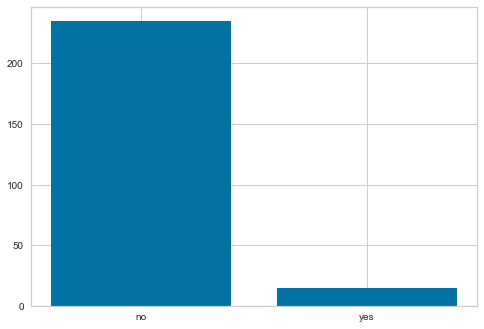

In [1480]:
plt.bar(range(len(DKNN)), list(DKNN.values()), align='center')
plt.xticks(range(len(DKNN)), list(DKNN.keys()))

plt.show()

## Run Top Model --CART Tuned Standardized with Full Data

In [1555]:
#Training Set (Feature Space: X Training)   
X_trainClassiSTDall = (featuresClassiSTD)
X_trainClassiSTDall.head()

,SEX,EDUCATION,MARRIAGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,Hx_PAY_Apr_05,Bill_stmt_Sept_05,...,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,BAL_LIMIT_GROUPED,age_by_decade
0,0.811187,0.275574,-1.058927,1.790109,1.773831,-0.698359,-0.668048,-1.528501,-1.486403,-0.640718,...,-0.662646,-0.652698,-0.340684,-0.225210,-0.295671,-0.306902,-0.314098,-0.293155,10000,20
1,0.811187,0.275574,0.857702,-0.877180,1.773831,0.134384,0.184498,0.230896,1.983329,-0.657516,...,-0.605702,-0.597884,-0.340684,-0.211742,-0.238570,-0.243273,-0.314098,-0.179938,10000,20
2,0.811187,0.275574,0.857702,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.295134,...,-0.416281,-0.391334,-0.249223,-0.190091,-0.238570,-0.243273,-0.248443,-0.010113,10000,30
3,0.811187,0.275574,-1.058927,0.011916,0.107627,0.134384,0.184498,0.230896,0.248463,-0.052913,...,-0.185358,-0.156042,-0.220182,-0.167616,-0.227150,-0.236910,-0.243913,-0.236547,10000,30
4,-1.232761,0.275574,-1.058927,-0.877180,0.107627,-0.698359,0.184498,0.230896,0.248463,-0.576530,...,-0.347091,-0.331125,-0.220182,1.333368,0.275338,0.265754,-0.268862,-0.254718,10000,50


In [1556]:
#Dependent Variable Training Set (y Training) 
y_trainClassiSTDall= depVarClassiSTD
y_trainClassiSTDall_count = len(y_trainClassiSTDall.index)
print('The number of observations in the Y training set are:',str(y_trainClassiSTDall_count))
y_trainClassiSTDall.head()

The number of observations in the Y training set are: 29546


0    yes
1    yes
2     no
3     no
4     no
Name: defaulted, dtype: object

In [1558]:
X_trainClassiSTDall, X_testClassiSTDall, y_trainClassiSTDall, y_testClassiSTDall = train_test_split(X_trainClassiSTDall, y_trainClassiSTDall)
X_trainClassiSTDall.shape, X_testClassiSTDall.shape

((22159, 23), (7387, 23))

In [1559]:
# Tune parameters and use Grid Search
CARTSTDTunedAll=DecisionTreeClassifier(criterion="entropy", max_depth=3) 

params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

CARTSTDTuned = GridSearchCV(estimator=CARTSTDTunedAll,
param_grid=params_dt,
scoring='accuracy'
,
cv=10,
n_jobs=-1)

results=cross_val_score(CARTSTDTuned,X_trainClassiSTDall,y_trainClassiSTDall,cv=kfold) 
print(results.mean())

0.8099645916014049


In [1560]:
modelCARTSTDTunedAll = CARTSTDTunedAll.fit(X_trainClassiSTDall,y_trainClassiSTDall)
modelCARTSTDTunedAll

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1561]:
# more results from loaded model
print('The CART scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTSTDTunedAll, X_trainClassiSTDall, y_trainClassiSTDall)) 

The CART scores per cv split, score array, train, test:  [0.81968323 0.82063084 0.81475965]


In [1572]:
# Make predictions using the test set
target_predCARTSTDTunedAll = modelCARTSTDTunedAll.predict(X_testClassiSTDall)

In [1573]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTDall, target_predCARTSTDTunedAll, normalize = True)


0.8245566535806146

In [ ]:
# save model 

In [1574]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTSTDTunedAll.sav'

In [1575]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTSTDTunedAll, open(filename, 'wb'))

In [1576]:
# Count the number of yes and no values that are returned
DAll = dict(zip(*np.unique(target_predCARTSTDTunedAll, return_counts=True)))
print(DAll)


{'no': 6598, 'yes': 789}


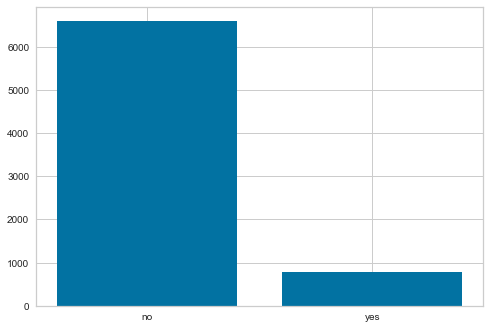

In [1577]:
# graph the number of yes and no values returned
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.bar(range(len(DAll)), list(DAll.values()), align='center')
plt.xticks(range(len(DAll)), list(DAll.keys()))

plt.show()

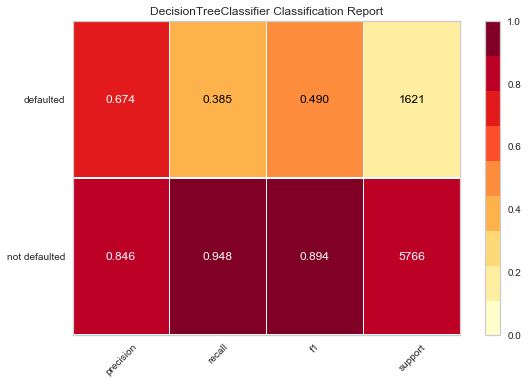

In [1580]:
classes = ["not defaulted", "defaulted"]
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelCARTSTDTunedAll, classes=classes, support=True)

visualizer.fit(X_trainClassiSTDall, y_trainClassiSTDall)  # Fit the visualizer and the model
visualizer.score(X_testClassiSTDall, y_testClassiSTDall)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Additional Analysis

In [1503]:
# Education and age_by_decade are the most interesting of the demographic attributes predicting default
# for the CART model built using standardized data and with model tuning

In [1511]:
# create new data frame so as not to edit existing
creditExtraColsGraph = creditExtraCols
# add labels for educational level for graphing
creditExtraColsGraph['EDUCATION_desc'] = creditExtraColsGraph.EDUCATION.map({0:'others', 1:'graduate school', 2:'university', 3:'high school'})

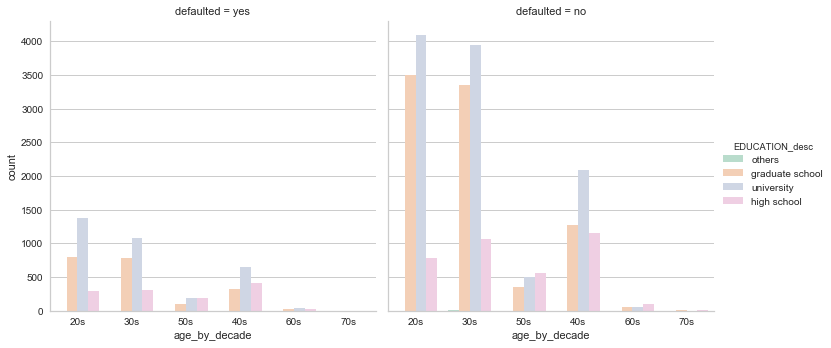

In [1533]:
sns.factorplot('age_by_decade', data=creditExtraColsGraph, hue='EDUCATION_desc', kind='count', 
               palette='Pastel2', hue_order=['others', 'graduate school','university','high school'],
              col='defaulted')


In [1548]:

# add labels for Hx_PAY_Sept_05 level for graphing
creditExtraColsGraph['Hx_PAY_Sept_05_desc'] = creditExtraColsGraph.Hx_PAY_Sept_05.map({-2:'No Consumption',
    -1:'paid in full', 0:'revolving credit', 1:'1 mo payment delay', 2:'2 month payment delay', 
    3:'3 month payment delay',
    4:'4 month payment delay', 5:'5 month payment delay', 6:'6 month payment delay', 7:'7 month payment delay',
    8:'8 month payment delay', 9:'9 month plus payment delay'})
creditExtraColsGraph                                                                 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month,age_group,High_School,defaulted,BAL_LIMIT_GROUPED,age_by_decade,EDUCATION_desc,Hx_PAY_Sept_05_desc
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,1,under_thirty,Female_Col,yes,10000s,20s,university,2 month payment delay
1,120000,2,2,2,26,-1,2,0,0,0,...,0,2000,1,under_thirty,Female_Col,yes,10000s,20s,university,paid in full
2,90000,2,2,2,34,0,0,0,0,0,...,1000,5000,0,thirty_and_over,Female_Col,no,10000s,30s,university,revolving credit
3,50000,2,2,1,37,0,0,0,0,0,...,1069,1000,0,thirty_and_over,Female_Col,no,10000s,30s,university,revolving credit
4,50000,1,2,1,57,-1,0,-1,0,0,...,689,679,0,thirty_and_over,Male_Col,no,10000s,50s,university,paid in full
5,50000,1,1,2,37,0,0,0,0,0,...,1000,800,0,thirty_and_over,Male_Grad_School,no,10000s,30s,graduate school,revolving credit
6,500000,1,1,2,29,0,0,0,0,0,...,13750,13770,0,under_thirty,Male_Grad_School,no,410000s,20s,graduate school,revolving credit
7,100000,2,2,2,23,0,-1,-1,0,0,...,1687,1542,0,under_thirty,Female_Col,no,10000s,20s,university,revolving credit
8,140000,2,3,1,28,0,0,2,0,0,...,1000,1000,0,under_thirty,Female_HS,no,10000s,20s,high school,revolving credit
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,1122,0,0,thirty_and_over,Male_HS,no,10000s,30s,high school,No Consumption


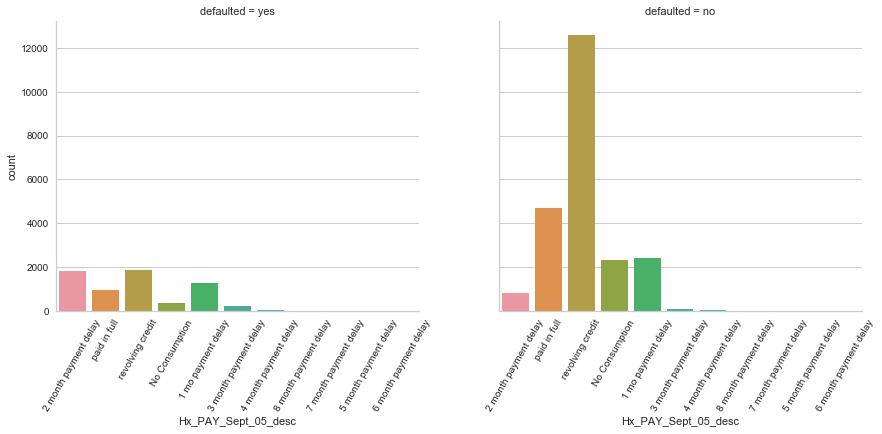

In [1554]:
g = sns.catplot('Hx_PAY_Sept_05_desc', data=creditExtraCols, kind='count', col='defaulted',
            aspect=1.25, height=5)
g.set_xticklabels(rotation=60)
